In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

C:\Users\INDIA\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Sparkling

In [2]:
# read data
df = pd.read_csv("Sparkling.csv",parse_dates=True,squeeze=True,index_col=0)
df = pd.DataFrame(df)

## 1.1  Read the data as an appropriate Time Series data and plot the data.

In [3]:
# top rows
df.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [4]:
# last  rows
df.tail()

Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [5]:
# number of rows and columns
df.shape

(187, 1)

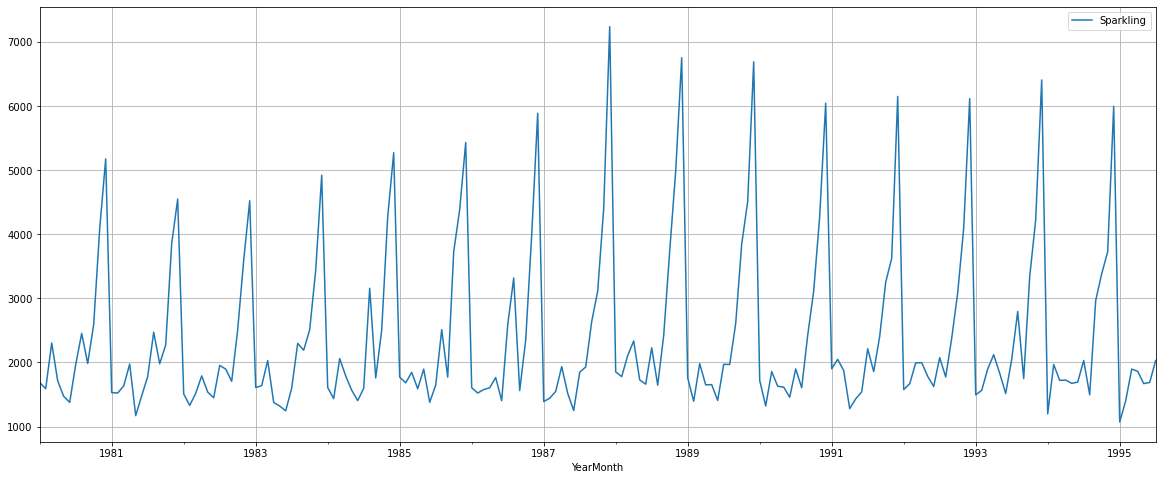

In [6]:
# plot 
df.plot(figsize=(20,8))
plt.grid();

In [7]:
df['Year']=df.index.year
df['Month']=df.index.month
df.head()

Sparkling  Year  Month
YearMonth                         
1980-01-01       1686  1980      1
1980-02-01       1591  1980      2
1980-03-01       2304  1980      3
1980-04-01       1712  1980      4
1980-05-01       1471  1980      5

In [8]:
df.columns=['Sales', 'Year', 'Month']
df.head()

Sales  Year  Month
YearMonth                     
1980-01-01   1686  1980      1
1980-02-01   1591  1980      2
1980-03-01   2304  1980      3
1980-04-01   1712  1980      4
1980-05-01   1471  1980      5

In [9]:
df.tail()

Sales  Year  Month
YearMonth                     
1995-03-01   1897  1995      3
1995-04-01   1862  1995      4
1995-05-01   1670  1995      5
1995-06-01   1688  1995      6
1995-07-01   2031  1995      7

In [10]:
# number of rows and columns
df.shape

(187, 3)

## 1.2 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.


In [11]:
# datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   187 non-null    int64
 1   Year    187 non-null    int64
 2   Month   187 non-null    int64
dtypes: int64(3)
memory usage: 5.8 KB


In [12]:
# statistical summary
round(df.describe().T)

count    mean     std     min     25%     50%     75%     max
Sales  187.0  2402.0  1295.0  1070.0  1605.0  1874.0  2549.0  7242.0
Year   187.0  1987.0     5.0  1980.0  1983.0  1987.0  1991.0  1995.0
Month  187.0     6.0     3.0     1.0     3.0     6.0     9.0    12.0

In [13]:
# isnull
df.isnull().sum()

Sales    0
Year     0
Month    0
dtype: int64

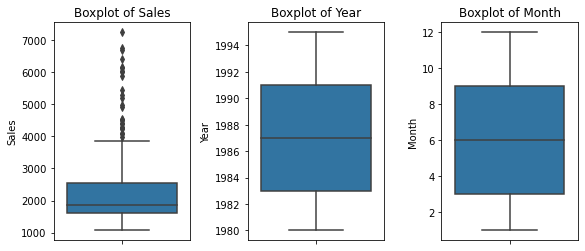

In [14]:
# boxplot

dfbox=df
plt.figure(figsize = (19,10))
feature_list = dfbox.columns
for i in range(len(feature_list)):
    plt.subplot(3, 7, i + 1)
    sns.boxplot(y = dfbox[feature_list[i]], data = dfbox)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### Sales

In [15]:
plt.figure(figsize=(15,6))
df['Sales'].plot()

<AxesSubplot:xlabel='YearMonth'>

### Yearly Boxplot

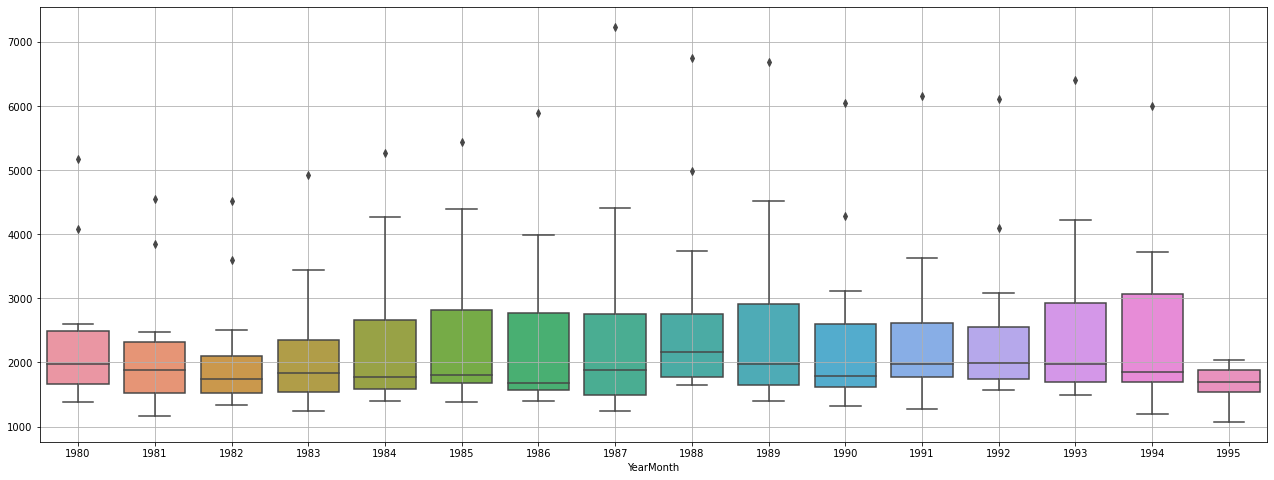

In [16]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

### Monthly Boxplot

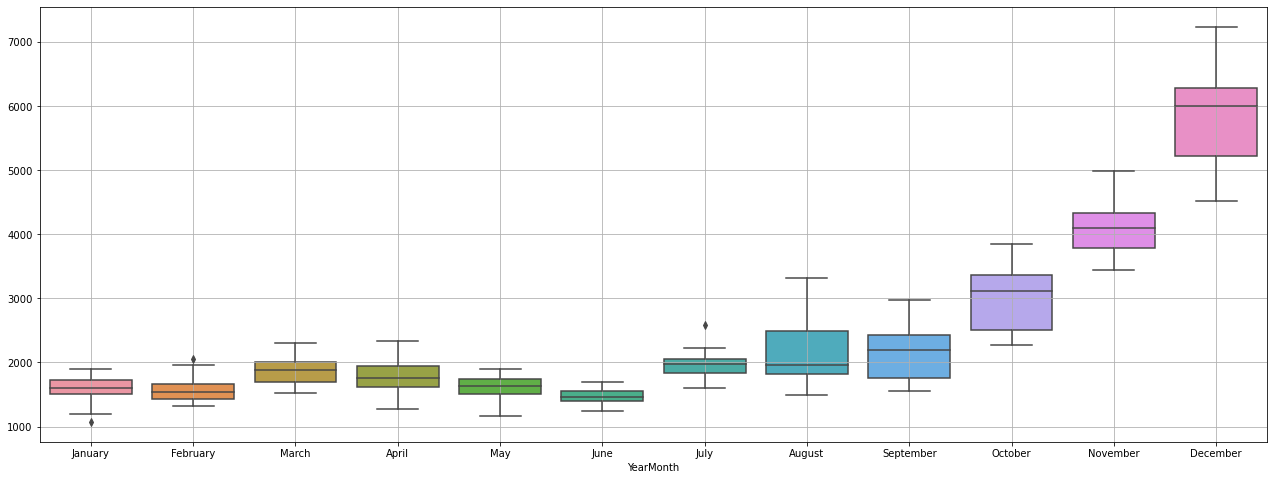

In [17]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

### Week Days Boxplot

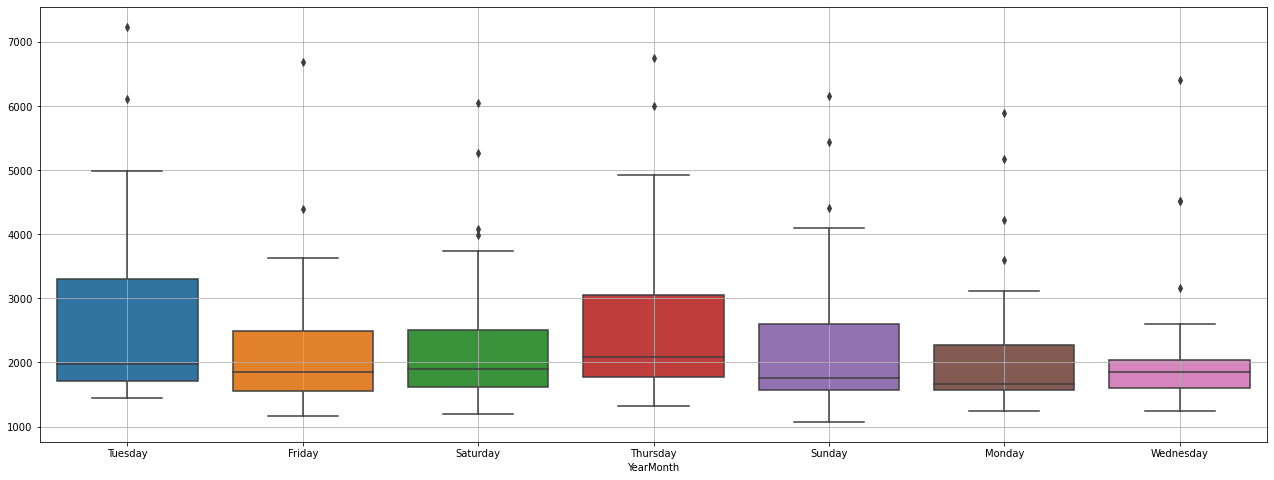

In [18]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.day_name(),y = df.values[:,0],ax=ax)
plt.grid();

### Graph of monthly sales across years

In [19]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sales', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

### Correlation plot

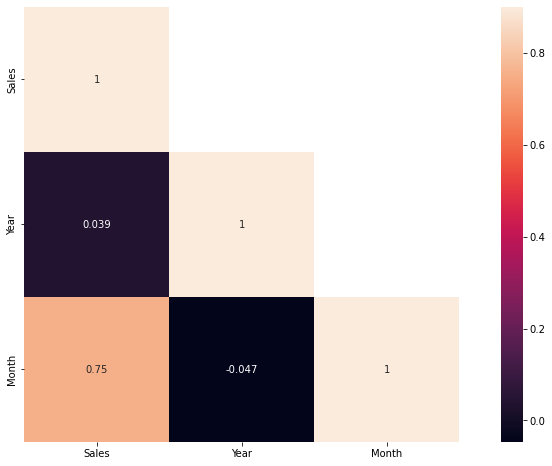

In [20]:
corr_all = df.corr()
mask = np.array(corr_all)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(corr_all, mask=mask,vmax=.9, square=True,annot=True);
plt.show()

### Plot ECDF: Empirical Cumulative Distribution Function

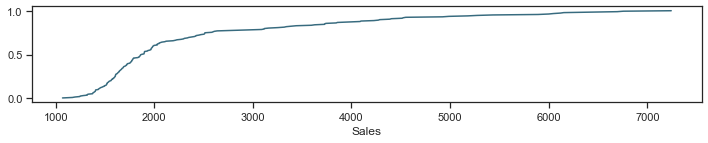

In [21]:
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

  
plt.subplot(312)
cdf = ECDF(df['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Sales');

### Decomposition 

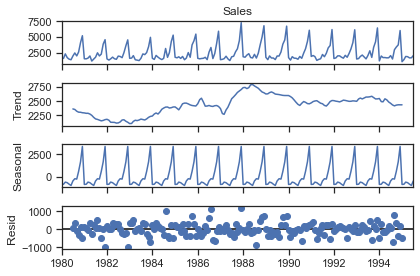

In [22]:
decomposition = seasonal_decompose(df['Sales'],model='additive')
decomposition.plot();

In [23]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


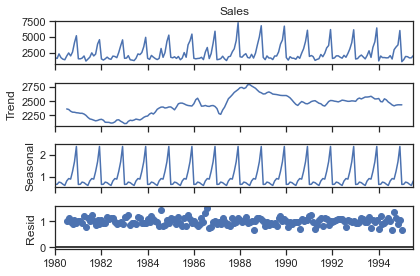

In [24]:
decomposition = seasonal_decompose(df['Sales'],model='multiplicative')
decomposition.plot();

In [25]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

## 1.3 Split the data into training and test. The test data should start in 1991.

In [26]:
# Split the data into training and testing sets
train = df[df.index < '1991-01-01']
test = df[df.index >= '1991-01-01']

In [27]:
print('Shape of datasets:')
print("train dataset: ",train.shape)
print("test dataset: ",test.shape,'\n')
print('Rows of dataset: ')
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

Shape of datasets:
train dataset:  (132, 3)
test dataset:  (55, 3) 

Rows of dataset: 
First few rows of Training Data 
             Sales  Year  Month
YearMonth                     
1980-01-01   1686  1980      1
1980-02-01   1591  1980      2
1980-03-01   2304  1980      3
1980-04-01   1712  1980      4
1980-05-01   1471  1980      5 

Last few rows of Training Data 
             Sales  Year  Month
YearMonth                     
1990-08-01   1605  1990      8
1990-09-01   2424  1990      9
1990-10-01   3116  1990     10
1990-11-01   4286  1990     11
1990-12-01   6047  1990     12 

First few rows of Test Data 
             Sales  Year  Month
YearMonth                     
1991-01-01   1902  1991      1
1991-02-01   2049  1991      2
1991-03-01   1874  1991      3
1991-04-01   1279  1991      4
1991-05-01   1432  1991      5 

Last few rows of Test Data 
             Sales  Year  Month
YearMonth                     
1995-03-01   1897  1995      3
1995-04-01   1862  1995      4
1995-0

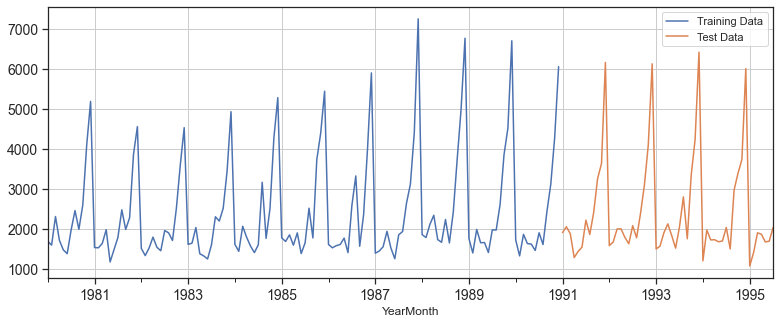

In [28]:
# Plot
train['Sales'].plot(figsize=(13,5), fontsize=14)
test['Sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## 1.4 Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

### Model 1: Linear Regression

In [29]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]

print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [30]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [31]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sales'].values)

LinearRegression()

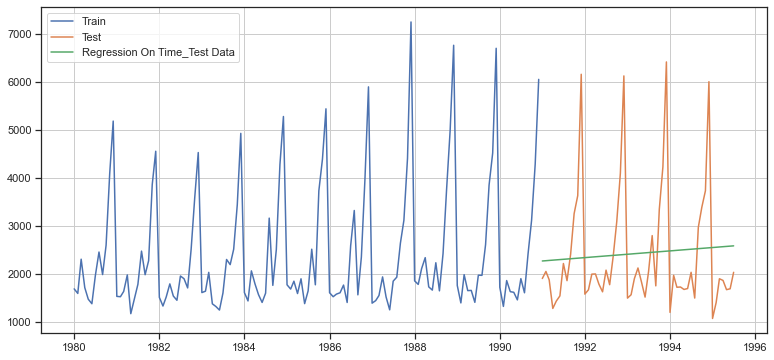

In [32]:
test_predictions_model1            = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [33]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sales'],test_predictions_model1,squared=False)
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Linear Regression'])
resultsDf

Test RMSE
Linear Regression  1275.867052

### Model 2: Naive Approach: 

In [34]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [35]:
NaiveModel_test['naive'] = np.asarray(train['Sales'])[len(np.asarray(train['Sales']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

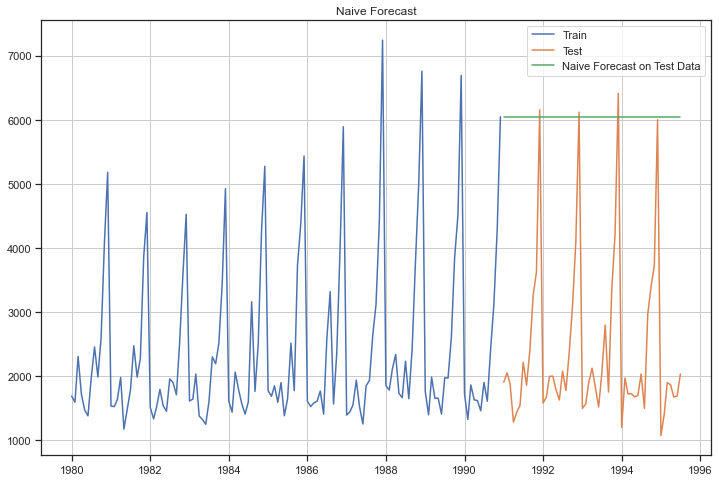

In [36]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [37]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sales'],NaiveModel_test['naive'],squared=False)
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
Linear Regression  1275.867052
Naive Model        3864.279352

### Model 3: Simple Average

In [38]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [39]:
SimpleAverage_test['mean_forecast'] = train['Sales'].mean()
SimpleAverage_test.head()

Sales  Year  Month  mean_forecast
YearMonth                                    
1991-01-01   1902  1991      1    2403.780303
1991-02-01   2049  1991      2    2403.780303
1991-03-01   1874  1991      3    2403.780303
1991-04-01   1279  1991      4    2403.780303
1991-05-01   1432  1991      5    2403.780303

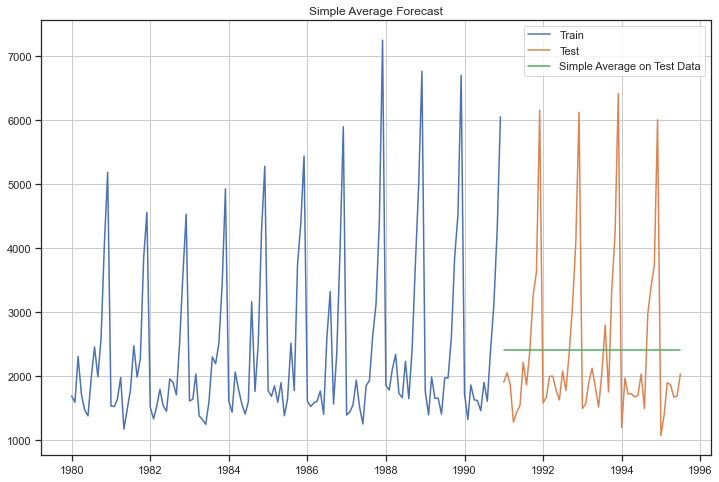

In [40]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sales'], label='Train')
plt.plot(SimpleAverage_test['Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();


In [41]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sales'],SimpleAverage_test['mean_forecast'],squared=False)
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Linear Regression     1275.867052
Naive Model           3864.279352
Simple Average Model  1275.081804

### Model 4: Moving Average

In [42]:
MovingAverage = df.copy()
MovingAverage.head()

Sales  Year  Month
YearMonth                     
1980-01-01   1686  1980      1
1980-02-01   1591  1980      2
1980-03-01   2304  1980      3
1980-04-01   1712  1980      4
1980-05-01   1471  1980      5

In [43]:
MovingAverage['Trailing_2'] = MovingAverage['Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sales'].rolling(9).mean()

MovingAverage.head()

Sales  Year  Month  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                                     
1980-01-01   1686  1980      1         NaN         NaN         NaN         NaN
1980-02-01   1591  1980      2      1638.5         NaN         NaN         NaN
1980-03-01   2304  1980      3      1947.5         NaN         NaN         NaN
1980-04-01   1712  1980      4      2008.0     1823.25         NaN         NaN
1980-05-01   1471  1980      5      1591.5     1769.50         NaN         NaN

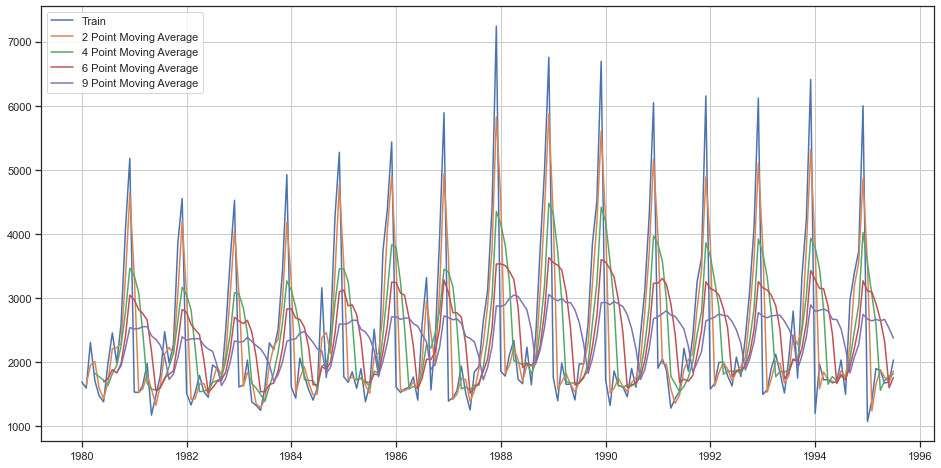

In [44]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [45]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index < '1991-01-01']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index >= '1991-01-01']
print(trailing_MovingAverage_test.shape)
print(trailing_MovingAverage_train.shape)

(55, 7)
(132, 7)


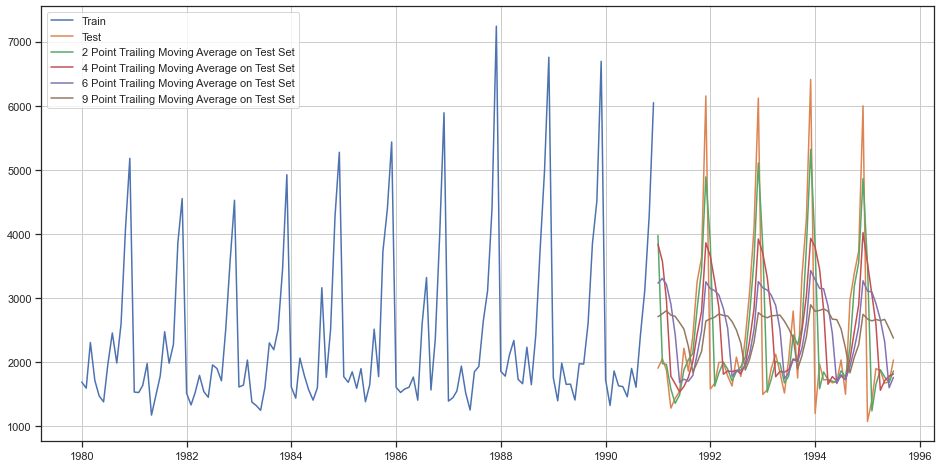

In [46]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sales'], label='Test')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [47]:
## Test Data - RMSE --> 2 point Trailing MA
rmse_model4_test_2 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)

## Test Data - RMSE  --> 4 point Trailing MA
rmse_model4_test_4 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)

## Test Data - RMSE --> 6 point Trailing MA
rmse_model4_test_6 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)

## Test Data - RMSE  --> 9 point Trailing MA
rmse_model4_test_9 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)

In [48]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
Linear Regression            1275.867052
Naive Model                  3864.279352
Simple Average Model         1275.081804
2pointTrailingMovingAverage   813.400684
4pointTrailingMovingAverage  1156.589694
6pointTrailingMovingAverage  1283.927428
9pointTrailingMovingAverage  1346.278315

### Model 5: Simple Exponential Smoothing


In [49]:
SES_train = train.copy()
SES_test = test.copy()

In [50]:
pip install --upgrade scipy

  Using cached scipy-1.11.1-cp39-cp39-win_amd64.whl (44.1 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\INDIA\\anaconda3\\Lib\\site-packages\\~cipy\\cluster\\_hierarchy.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [51]:
pip install --upgrade statsmodels

Note: you may need to restart the kernel to use updated packages.


In [52]:
model_SES = SimpleExpSmoothing(SES_train['Sales'])

C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [53]:
model_SES_autofit = model_SES.fit(optimized=True)

In [54]:
model_SES_autofit.params

{'smoothing_level': 0.03953488372093023,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [55]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [56]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sales  Year  Month      predict
YearMonth                                  
1991-01-01   1902  1991      1  2676.676366
1991-02-01   2049  1991      2  2676.676366
1991-03-01   1874  1991      3  2676.676366
1991-04-01   1279  1991      4  2676.676366
1991-05-01   1432  1991      5  2676.676366

In [57]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict',i],squared=False)
    
    resultsDf_temp = resultsDf_temp.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

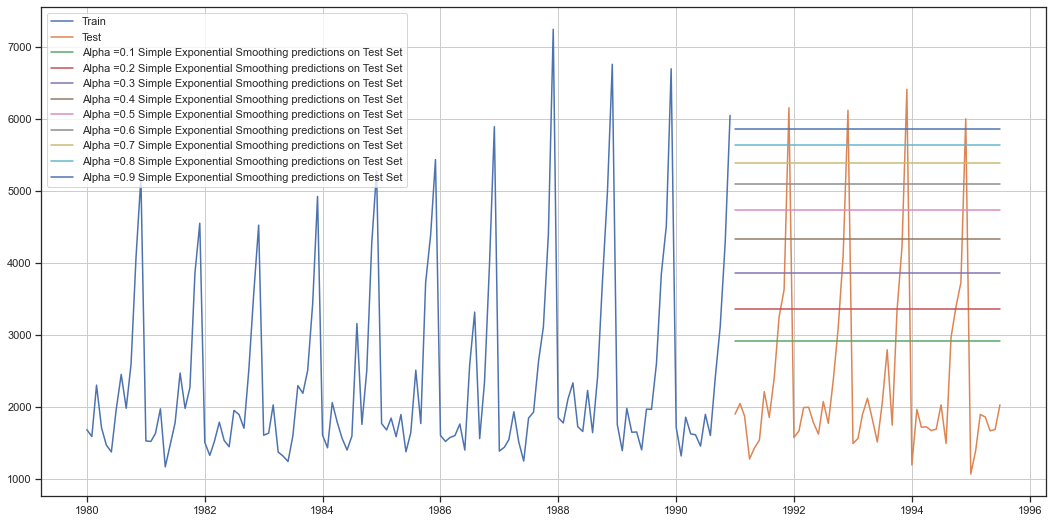

In [58]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.30000000000000004], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.5], label='Alpha =0.5 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.6], label='Alpha =0.6 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.7000000000000001], label='Alpha =0.7 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.8], label='Alpha =0.8 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.9], label='Alpha =0.9 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [59]:
resultsDf_temp.sort_values(by=['Test RMSE']).head(9)

Alpha Values   Train RMSE    Test RMSE
0           0.1  1333.873836  1375.393398
1           0.2  1356.042987  1595.206839
2           0.3  1359.511747  1935.507132
3           0.4  1352.588879  2311.919615
4           0.5  1344.004369  2666.351413
5           0.6  1338.805381  2979.204388
6           0.7  1338.844308  3249.944092
7           0.8  1344.462091  3483.801006
8           0.9  1355.723518  3686.794285

In [60]:
resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True)

## Test Data
resultsDf_5 = pd.DataFrame({'Test RMSE': [resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
Linear Regression                     1275.867052
Naive Model                           3864.279352
Simple Average Model                  1275.081804
2pointTrailingMovingAverage            813.400684
4pointTrailingMovingAverage           1156.589694
6pointTrailingMovingAverage           1283.927428
9pointTrailingMovingAverage           1346.278315
Alpha=0.1,SimpleExponentialSmoothing  1375.393398

### Method 6: Double Exponential Smoothing (Holt's Model)

In [61]:
DES_train = train.copy()
DES_test = test.copy()

In [62]:
model_DES = Holt(DES_train['Sales'])

C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [63]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
model_DES_autofit = model_DES.fit(optimized=True)

model_DES_autofit.params

C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [64]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Sales  Year  Month      predict
YearMonth                                  
1991-01-01   1902  1991      1  5221.278699
1991-02-01   2049  1991      2  5127.886554
1991-03-01   1874  1991      3  5034.494409
1991-04-01   1279  1991      4  4941.102264
1991-05-01   1432  1991      5  4847.710119

In [65]:
del resultsDf_temp
## First we will define an empty dataframe to store our values from the loop

resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [66]:
## Test Data

rmse_model_temp = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict'],squared=False)
print("For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model_temp))

For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 1304.927


In [67]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)
resultsDf_6

Alpha Values  Beta Values   Train RMSE     Test RMSE
0            0.1          0.1  1382.520870   1778.564670
1            0.1          0.2  1413.598835   2599.439986
2            0.1          0.3  1445.762015   4293.084674
3            0.1          0.4  1480.897776   6039.537339
4            0.1          0.5  1521.108657   7390.522201
..           ...          ...          ...           ...
95           1.0          0.6  1753.402326  49327.087977
96           1.0          0.7  1825.187155  52655.765663
97           1.0          0.8  1902.013709  55442.273880
98           1.0          0.9  1985.368445  57823.177011
99           1.0          1.0  2077.672157  59877.076519

[100 rows x 4 columns]

In [68]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [69]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE    Test RMSE
0            0.1          0.1  1382.520870  1778.564670
1            0.1          0.2  1413.598835  2599.439986
10           0.2          0.1  1418.041591  3611.763322
2            0.1          0.3  1445.762015  4293.084674
20           0.3          0.1  1431.169601  5908.185554

In [70]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
Linear Regression                                   1275.867052
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670

### Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [71]:
TES_train = train.copy()
TES_test = test.copy()

In [72]:
model_TES_ta_sa = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='additive')
model_TES_ta_sm = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='multiplicative')
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
model_TES_tm_sa = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='additive')

C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [73]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [74]:
model_TES_autofit_ta_sa = model_TES_ta_sa.fit(optimized=True)
model_TES_autofit_ta_sm = model_TES_ta_sm.fit(optimized=True)
model_TES_autofit_tm_sm = model_TES_tm_sm.fit(optimized=True)
model_TES_autofit_tm_sa = model_TES_tm_sa.fit(optimized=True)

C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [75]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [76]:
model_TES_autofit_ta_sa.params

{'smoothing_level': 0.11127218025549082,
 'smoothing_trend': 0.01236078344884856,
 'smoothing_seasonal': 0.4607177625005678,
 'damping_trend': nan,
 'initial_level': 2356.5781955695325,
 'initial_trend': -0.018629382309754305,
 'initial_seasons': array([-636.2336622 , -722.98363397, -398.64361027, -473.43090136,
        -808.42531193, -815.35036274, -384.23072634,   72.99502455,
        -237.44284242,  272.32573256, 1541.37815463, 2590.07742631]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [77]:
model_TES_autofit_ta_sm.params

{'smoothing_level': 0.11101220760873363,
 'smoothing_trend': 0.04931229141613127,
 'smoothing_seasonal': 0.3624630075688972,
 'damping_trend': nan,
 'initial_level': 2356.4944083975206,
 'initial_trend': -9.84005678473666,
 'initial_seasons': array([0.71400191, 0.68242746, 0.90425704, 0.80517582, 0.65565206,
        0.65356211, 0.88613212, 1.13347123, 0.91881202, 1.21182696,
        1.87089064, 2.37424138]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [78]:
model_TES_autofit_tm_sm.params

{'smoothing_level': 0.11105950016225202,
 'smoothing_trend': 0.04935435931484549,
 'smoothing_seasonal': 0.3622188768302799,
 'damping_trend': nan,
 'initial_level': 2357.161176620859,
 'initial_trend': 0.999697325206386,
 'initial_seasons': array([0.73111105, 0.69874416, 0.90049926, 0.81021521, 0.66840549,
        0.6691344 , 0.87891607, 1.11663153, 0.91684784, 1.17900619,
        1.82762886, 2.31595687]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [79]:
model_TES_autofit_tm_sa.params

{'smoothing_level': 0.11107142866032142,
 'smoothing_trend': 0.012341269861019839,
 'smoothing_seasonal': 0.4609259258337408,
 'damping_trend': nan,
 'initial_level': 2356.5416666887654,
 'initial_trend': 1.003171553167385,
 'initial_seasons': array([-636.18663196, -722.94704863, -398.70746525, -473.40538195,
        -808.38454863, -815.31163196, -384.22829861,   72.94878474,
        -237.3949653 ,  272.33420139, 1541.2821181 , 2590.00086809]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [80]:
TES_test['predict_ta_sa'] = model_TES_autofit_ta_sa.forecast(steps=len(test))
TES_test.head()

Sales  Year  Month  predict_ta_sa
YearMonth                                    
1991-01-01   1902  1991      1    1490.574235
1991-02-01   2049  1991      2    1204.714115
1991-03-01   1874  1991      3    1688.940876
1991-04-01   1279  1991      4    1551.450561
1991-05-01   1432  1991      5    1461.440159

In [81]:
TES_test['predict_ta_sm'] = model_TES_autofit_ta_sm.forecast(steps=len(test))
TES_test.head()

Sales  Year  Month  predict_ta_sa  predict_ta_sm
YearMonth                                                   
1991-01-01   1902  1991      1    1490.574235    1587.931997
1991-02-01   2049  1991      2    1204.714115    1356.648330
1991-03-01   1874  1991      3    1688.940876    1763.353553
1991-04-01   1279  1991      4    1551.450561    1656.524493
1991-05-01   1432  1991      5    1461.440159    1542.390676

In [82]:
TES_test['predict_tm_sm'] = model_TES_autofit_tm_sm.forecast(steps=len(test))
TES_test.head()

Sales  Year  Month  predict_ta_sa  predict_ta_sm  predict_tm_sm
YearMonth                                                                  
1991-01-01   1902  1991      1    1490.574235    1587.931997    1591.461992
1991-02-01   2049  1991      2    1204.714115    1356.648330    1360.467309
1991-03-01   1874  1991      3    1688.940876    1763.353553    1768.026486
1991-04-01   1279  1991      4    1551.450561    1656.524493    1661.672423
1991-05-01   1432  1991      5    1461.440159    1542.390676    1547.454096

In [83]:
TES_test['predict_tm_sa'] = model_TES_autofit_tm_sa.forecast(steps=len(test))
TES_test.head()

Sales  Year  Month  predict_ta_sa  predict_ta_sm  predict_tm_sm  \
YearMonth                                                                     
1991-01-01   1902  1991      1    1490.574235    1587.931997    1591.461992   
1991-02-01   2049  1991      2    1204.714115    1356.648330    1360.467309   
1991-03-01   1874  1991      3    1688.940876    1763.353553    1768.026486   
1991-04-01   1279  1991      4    1551.450561    1656.524493    1661.672423   
1991-05-01   1432  1991      5    1461.440159    1542.390676    1547.454096   

            predict_tm_sa  
YearMonth                  
1991-01-01    1511.756579  
1991-02-01    1227.680657  
1991-03-01    1713.866725  
1991-04-01    1578.252255  
1991-05-01    1490.255624

In [84]:
## Test Data

rmse_model_temp_ta_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa'],squared=False)
print("For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sa))

## Test Data

rmse_model_temp_ta_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm'],squared=False)
print("For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sm))

## Test Data

rmse_model_temp_tm_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm'],squared=False)
print("For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sm))

## Test Data

rmse_model_temp_tm_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa'],squared=False)
print("For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sa))

For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is 378.627
For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 402.924
For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 380.300
For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is 354.454


In [85]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse_model_temp}
                           ,index=['Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Linear Regression                                   1275.867052
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1304.927405

In [86]:
TES_train = train.copy()
TES_test = test.copy()
del resultsDf_7_2

## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],
                             'Method' : []})
resultsDf_7_2


Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE, Method]
Index: []

In [87]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sa',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sa'}
                                                 , ignore_index=True)


In [88]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sm',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sm'}
                                                 , ignore_index=True)


In [89]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sm',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sm'}
                                                 , ignore_index=True)


In [90]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sa',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sa'}
                                                 , ignore_index=True)

In [91]:
TES_test.head()

Sales  Year  Month  (predict_ta_sa, 0.1, 0.1, 0.1)  \
YearMonth                                                        
1991-01-01   1902  1991      1                     1671.894991   
1991-02-01   2049  1991      2                     1535.938082   
1991-03-01   1874  1991      3                     1882.992874   
1991-04-01   1279  1991      4                     1798.243923   
1991-05-01   1432  1991      5                     1576.572747   

            (predict_ta_sa, 0.1, 0.1, 0.2)  \
YearMonth                                    
1991-01-01                     1540.529588   
1991-02-01                     1354.094081   
1991-03-01                     1728.658127   
1991-04-01                     1638.281580   
1991-05-01                     1470.697707   

            (predict_ta_sa, 0.1, 0.1, 0.30000000000000004)  \
YearMonth                                                    
1991-01-01                                     1472.827405   
1991-02-01                                     1236.723426   
1991-03-01                                     1644.294990   
1991-04-01                                     1535.922824   
1991-05-01                                     1394.544409   

            (predict_ta_sa, 0.1, 0.1, 0.4)  (predict_ta_sa, 0.1, 0.1, 0.5)  \
YearMonth                                                                    
1991-01-01                     1444.947521                     1440.100315   
1991-02-01                     1163.127303                     1118.381068   
1991-03-01                     1605.772780                     1593.658780   
1991-04-01                     1469.062420                     1424.230588   
1991-05-01                     1347.223962                     1324.218679   

            (predict_ta_sa, 0.1, 0.1, 0.6)  \
YearMonth                                    
1991-01-01                     1446.456719   
1991-02-01                     1091.681321   
1991-03-01                     1593.602194   
1991-04-01                     1393.229741   
1991-05-01                     1318.006765   

            (predict_ta_sa, 0.1, 0.1, 0.7000000000000001)  ...  \
YearMonth                                                  ...   
1991-01-01                                    1456.102126  ...   
1991-02-01                                    1075.381082  ...   
1991-03-01                                    1595.700721  ...   
1991-04-01                                    1370.975056  ...   
1991-05-01                                    1319.843928  ...   

            (predict_tm_sa, 0.9, 0.8, 0.9)  (predict_tm_sa, 0.9, 0.9, 0.1)  \
YearMonth                                                                    
1991-01-01                   -5.868610e+20                     1681.548575   
1991-02-01                   -1.101754e+23                     2493.688129   
1991-03-01                   -4.674701e+24                     3209.508652   
1991-04-01                   -5.266723e+25                     3046.434803   
1991-05-01                   -1.636152e+26                     2755.658417   

            (predict_tm_sa, 0.9, 0.9, 0.2)  \
YearMonth                                    
1991-01-01                     1003.861817   
1991-02-01                     1469.309964   
1991-03-01                     2499.957287   
1991-04-01                     2171.122226   
1991-05-01                     1623.114204   

            (predict_tm_sa, 0.9, 0.9, 0.30000000000000004)  \
YearMonth                                                    
1991-01-01                                     1011.116778   
1991-02-01                                     1145.238568   
1991-03-01                                     2962.569457   
1991-04-01                                     3050.550334   
1991-05-01                                     2612.626803   

            (predict_tm_sa, 0.9, 0.9, 0.4)  (predict_tm_sa, 0.9, 0.9, 0.5)  \
YearMonth                                                                  

In [92]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE Method
1301           0.4          0.1           0.2  384.467709  317.434302  ta_sm
2245           0.4          0.1           0.3  381.106645  326.579641  tm_sm
1211           0.3          0.2           0.2  388.544148  329.037543  ta_sm
1200           0.3          0.1           0.1  388.220071  337.080969  ta_sm
1110           0.2          0.2           0.1  398.482510  340.186457  ta_sm

In [93]:
resultsDf_7_3 = pd.DataFrame({'Test RMSE': [resultsDf_7_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_3])
resultsDf


Test RMSE
Linear Regression                                   1275.867052
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1304.927405
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302

In [94]:
#  Best figures obtained for Trend = Multiplicative and Seasonality = Multiplicative
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict_tm_sm', 0.4, 0.1, 0.30000000000000004], 
         label='Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

## 1.5 Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [95]:
from statsmodels.tsa.stattools import adfuller

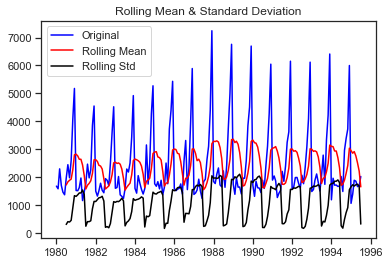

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [96]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
test_stationarity(df['Sales'])

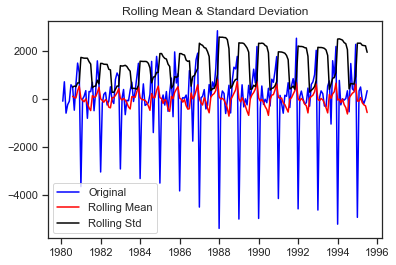

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [97]:
test_stationarity(df['Sales'].diff().dropna())

## 1.6 Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [98]:
import itertools
p = q = range(0, 4)
d= range(1,2) #since series is stationary at d=1
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [99]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [100]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155918473
ARIMA(0, 1, 2) - AIC:2234.4083231266072
ARIMA(0, 1, 3) - AIC:2233.9948577440127
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.7550946777883
ARIMA(1, 1, 2) - AIC:2234.5272004523094
ARIMA(1, 1, 3) - AIC:2235.607812019134
ARIMA(2, 1, 0) - AIC:2260.365743968086
ARIMA(2, 1, 1) - AIC:2233.7776263149635
ARIMA(2, 1, 2) - AIC:2213.5092124849007


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:2232.9704368339308
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.498597385455


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 2) - AIC:2230.9082334735585
ARIMA(3, 1, 3) - AIC:2221.4647204024486


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [101]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
10  (2, 1, 2)  2213.509212
15  (3, 1, 3)   2221.46472
14  (3, 1, 2)  2230.908233
11  (2, 1, 3)  2232.970437
9   (2, 1, 1)  2233.777626
3   (0, 1, 3)  2233.994858
2   (0, 1, 2)  2234.408323
6   (1, 1, 2)    2234.5272
13  (3, 1, 1)  2235.498597
7   (1, 1, 3)  2235.607812
5   (1, 1, 1)  2235.755095
12  (3, 1, 0)  2257.723379
8   (2, 1, 0)  2260.365744
1   (0, 1, 1)  2263.060016
4   (1, 1, 0)  2266.608539
0   (0, 1, 0)  2267.663036

In [102]:
auto_ARIMA = ARIMA(train['Sales'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sat, 08 Jul 2023   AIC                           2213.509
Time:                        08:22:24   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.216      0.0

### Predict on the Test Set using this model and evaluate the model.


In [103]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

rmse = mean_squared_error(test['Sales'], predicted_auto_ARIMA.tolist(), squared=False)
print(rmse)

1299.9797790918212


In [104]:
results = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Auto_ARIMA'])

resultsDf = pd.concat([resultsDf, results])
resultsDf

Test RMSE
Linear Regression                                   1275.867052
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1304.927405
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Auto_ARIMA                                          1299.979779

## AUTO- SARIMA

In [105]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [106]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [107]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.261461684376
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640236719
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3875.9371140019684
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389572
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791699


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3726.4199366637235
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470853
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.205415860856
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920772


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:4187.342683151317
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308406
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.1871052625802
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530065428


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3960.9535571110255
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505816
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566464
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572851032


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:3468.307106679336
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.179588183879
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193802662
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319653957996


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3355.800373385754
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954179415
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085408215
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018829577903


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3065.830650462114
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:1428.4607679614953
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:1428.87279866185
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:1429.5891916778187


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3061.5289577921008
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2187.441010168703
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1887.9128007201386
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1659.8789892815912


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:4088.9381681642403
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1790.0326332306981
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1724.16750781959
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1557.1605068178774
SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:3688.4529716474667
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1603.9654774496214
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.5438853174855
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1557.121563029515


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:3680.652297493866
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:1428.5993408149404
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:1429.744837013814
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:1430.6883835777262


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:3380.6493475154493
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:2168.0925408439707
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1873.9770699391674
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:1643.2973661217645


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:2784.75116844118
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1792.035764365939
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1710.640407858967
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:1542.7418976915733


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:2755.6153108670233
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:1604.5715807854942
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:1601.0674816606884
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:1543.0488937949779


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:2328.8038309167696
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:1429.652944941114
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:1441.1435177263736
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:1431.0415174419697


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:2370.455045631567
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1954.3938339904244
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.2688476355102


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3672.109329756083
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1811.2440279331133
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1788.534359268125
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1616.4894402590403


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3575.0113383656685
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1621.6355080129106
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1617.1356131972268
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1616.5412067676946


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3267.3185599362773
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:1440.5134640369845
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:1442.171978035391
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:1443.7660409492507


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3265.466314309309
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2204.934049154585
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1907.3558974131565
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1678.0981352692652


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:3544.175950013732
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1775.1424467135735
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1739.7167482897225
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1571.3248863527115


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3530.2757873955748
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1590.6161606870105
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1586.3142234495297
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1571.8069969475698


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3146.345566587146
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:1414.9112074447494
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:1415.9502717423195
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:1417.0903642824396
SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3150.340757195448
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2188.4633450503707
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1889.7708307500077
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1659.6291421468932


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:4328.959275985308
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1771.8259799226453
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1723.9952183845505
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1555.5842476232233


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:4220.7580797077435
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1588.4216931715316
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1585.515289186955
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1555.9296541346619


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3926.263643586159
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:1413.8102395305536
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:1414.914697942059
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:1415.9690455506604


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3930.3412992269987
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:2171.026403977635
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1869.9381459054366
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:1646.5218859617157


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:3376.1128638610126
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1772.3921596141925
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1711.955488867027
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:1542.574459732766


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3250.246121104298
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:1590.4159492804308
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:1587.3668970609738
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:1543.1292691660758


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:2931.7615573066473
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:1415.772333163798
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:1416.750984352641
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:1417.7649208551024


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:3091.21712115626
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1946.4383435413836
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1711.4123039810577


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:3046.1845081996116
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1780.7646066055331
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1756.935734924148
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1600.9702204081193


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:3413.7700357567223
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1592.2403464857316
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1587.6344986678646
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1585.9191746802314


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3468.2812300880314
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:1411.9449728030118
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:1413.1017619265851
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:1414.1975653292475


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:3236.01232951714
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2199.858613145544
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1905.016997176694
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.4234080321598


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:3616.207039543722
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.8234290244814
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.0911247857605
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1571.9888279670088
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3731.3884740418034
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.1235061143313
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.1595850717333
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.342864950293


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:2369.6354804179164
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1402.4673331274312
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1403.1221280626432
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1403.5824603459007


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3105.1182646273323
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.868114597034
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372629235624
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.5523432350874
SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3591.0708058818477
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.2140936786404
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.6005776100892
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.3404024267788


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3386.170548977424
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1625.22754220214
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1573.5476023857127
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1560.3600149682463


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3214.6982511378374
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:1401.437614135399
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:1402.5040277392438
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:1403.435921769566


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3260.7490265767983
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:2171.0395888900293
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1866.7425736892642
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:1646.7072773122336


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:3731.87549471257
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1759.0456860018899
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1713.7662523939964
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:1541.00970317405


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3654.9514292947533
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:1577.698152176804
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:1573.7195811502922
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:1543.9977065531646


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3331.9937375546556
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:1399.7898217153172
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:1406.8295688838132
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:1406.9879486418192


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3333.910888001611
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:2208.40250139061
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1946.3686291418535
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:1709.5089923153737


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:3242.9849658114476
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1762.7961104702674
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1740.3783834543156
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:1600.0471976866374


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3763.5085267548616
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:1578.2748025562855
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:1572.933081390767
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:1571.6808201696977


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3302.7416063276537
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:1396.8678620470696
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:1397.6774715192944
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:1398.2798340272846


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3231.2845307965276
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:2188.2220983378065
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1906.9690711138544
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:1677.423405047822


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:3001.1830233413716
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1746.2222519299535
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1727.3085082869582
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:1573.6845007591592


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3732.470638579167
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:1564.9377505437499
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:1576.2959850131367
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:1576.3498143092506


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:2073.4752243406506
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:1387.7883316192592
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:1388.6814840112295
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:1389.1959029869731
SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3403.011499786591
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:2187.3147265253006
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1887.780417067392
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:1659.6255024721595


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:3735.4115877942163
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1744.9635864495513
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1727.3650494732447
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:1559.4364168234415


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3422.72160928542
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:1564.2926939900549
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:1563.0826077145086
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:1559.8091539347497


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3338.202019599086
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:1387.2347179936457
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:1388.6021957824908
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:1389.7019930869155


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3381.5461309207676
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:2155.7749542046868
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1870.0410343370643
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:1643.7830052768006


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:3733.945970079206
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1755.7426090856263
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1850.1149195974435
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:1544.3935759304084


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:4165.366572393958
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:1567.1763978987929
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:1561.9915554658494
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:1545.7744324941602


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3056.908795362979
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:1389.1420844965287
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:1403.8180141671896
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:1391.6961993819793


C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:3195.892712088136


In [108]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
236  (3, 1, 2)  (3, 0, 0, 12)  1387.234718
220  (3, 1, 1)  (3, 0, 0, 12)  1387.788332
237  (3, 1, 2)  (3, 0, 1, 12)  1388.602196
221  (3, 1, 1)  (3, 0, 1, 12)  1388.681484
252  (3, 1, 3)  (3, 0, 0, 12)  1389.142084

In [109]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sat, 08 Jul 2023   AIC                           1555.584
Time:                                    08:47:07   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6281      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

### Predict on the Test Set using this model and evaluate the model.

In [110]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.355912  388.344619     566.214445    2088.497379
1  1315.106670  402.012619     527.176415    2103.036925
2  1621.580611  402.006219     833.662901    2409.498321
3  1598.851429  407.245099     800.665701    2397.037157
4  1392.679569  407.975698     593.061895    2192.297243

In [111]:
rmse = mean_squared_error(test['Sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

528.6070008695357


In [112]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['(1,1,1),(2,0,3,12),Auto_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

Test RMSE
Linear Regression                                   1275.867052
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1304.927405
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Auto_ARIMA                                          1299.979779
(1,1,1),(2,0,3,12),Auto_SARIMA                       528.607001

#### Model  : Manual ARIMA

In [113]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

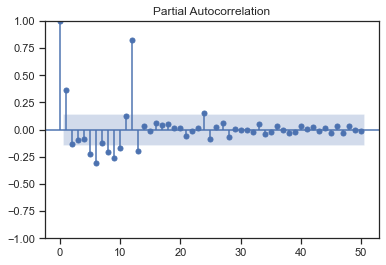

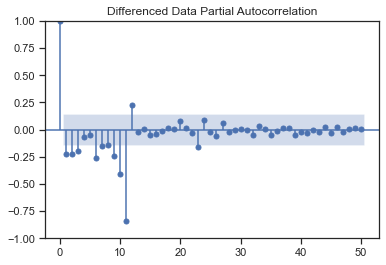

In [114]:
plot_pacf(df['Sales'],lags=50)
plot_pacf(df['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

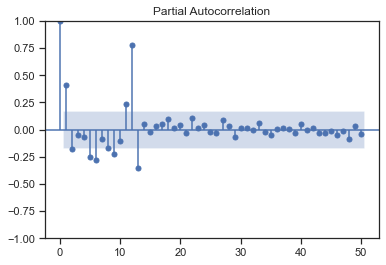

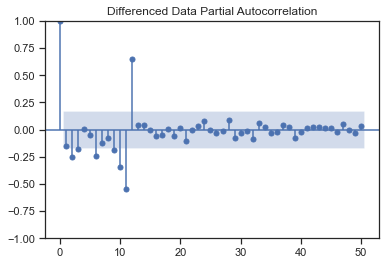

In [115]:
plot_pacf(train['Sales'],lags=50)
plot_pacf(train['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [116]:
manual_ARIMA = ARIMA(train['Sales'], order=(1,1,1))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1114.878
Date:                Sat, 08 Jul 2023   AIC                           2235.755
Time:                        08:50:58   BIC                           2244.381
Sample:                    01-01-1980   HQIC                          2239.260
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4494      0.043     10.366      0.000       0.364       0.534
ma.L1         -0.9996      0.102     -9.811      0.000      -1.199      -0.800
sigma2      1.401e+06   7.57e-08   1.85e+13      0.0

In [117]:
results_manual_ARIMA.plot_diagnostics();

In [118]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
rmse = mean_squared_error(test['Sales'],predicted_manual_ARIMA,squared=False)
print('RMSE:',rmse)

RMSE: 1319.9367337357605


In [119]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(3,1,3)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
Linear Regression                                   1275.867052
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1304.927405
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Auto_ARIMA                                          1299.979779
(1,1,1),(2,0,3,12),Auto_SARIMA                       528.607001
ARIMA(3,1,3)                                        1319.936734

#### Model  : Manual SARIMA

In [120]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC


Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [121]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforc1e_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -882.088
Date:                            Sat, 08 Jul 2023   AIC                           1774.175
Time:                                    08:56:47   BIC                           1788.071
Sample:                                         0   HQIC                          1779.818
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1957      0.104      1.878      0.060      -0.009       0.400
ma.L1         -0.9404      0.053   

In [122]:
SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_manual_SARIMA.aic},
                               ignore_index=True)
SARIMA_AIC

param       seasonal          AIC
0  (3, 1, 3)  (3, 0, 3, 12)  1774.175347

In [123]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [124]:
predicted_manual_SARIMA_6 = results_manual_SARIMA.get_forecast(steps=len(test))
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1543.900068  388.532053     782.391237    2305.408900
1  1311.208247  400.994065     525.274322    2097.142171
2  1810.538053  403.246196    1020.190032    2600.886073
3  1650.451753  404.472601     857.700023    2443.203484
4  1561.609703  405.532740     766.780137    2356.439268

In [125]:
rmse_manual_sarima = mean_squared_error(test['Sales'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse_manual_sarima)

359.61245030168203


In [126]:
resultsDf_10_1 = pd.DataFrame({'Test RMSE': rmse_manual_sarima}
                           ,index=['(1,1,1)(1,1,1,12),Manual_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_10_1])
resultsDf

Test RMSE
Linear Regression                                   1275.867052
Naive Model                                         3864.279352
Simple Average Model                                1275.081804
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
6pointTrailingMovingAverage                         1283.927428
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1304.927405
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
Auto_ARIMA                                          1299.979779
(1,1,1),(2,0,3,12),Auto_SARIMA                       528.607001
ARIMA(3,1,3)                                        1319.936734
(1,1,1)(1,1,1,12),Manual_SARIMA                      359.612450

## 1.7 Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [127]:
resultsDf.sort_values(by=['Test RMSE'])

Test RMSE
Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialS...   317.434302
(1,1,1)(1,1,1,12),Manual_SARIMA                      359.612450
(1,1,1),(2,0,3,12),Auto_SARIMA                       528.607001
2pointTrailingMovingAverage                          813.400684
4pointTrailingMovingAverage                         1156.589694
Simple Average Model                                1275.081804
Linear Regression                                   1275.867052
6pointTrailingMovingAverage                         1283.927428
Auto_ARIMA                                          1299.979779
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  1304.927405
ARIMA(3,1,3)                                        1319.936734
9pointTrailingMovingAverage                         1346.278315
Alpha=0.1,SimpleExponentialSmoothing                1375.393398
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  1778.564670
Naive Model                                         3864.279352

## 1.8  Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [128]:
date = pd.date_range(start='8/1/1995', end='7/1/1996', freq='MS')
date

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [129]:
future_predictions=pd.DataFrame(columns=['Sales_Predictions'],index=date)

In [130]:
TES_train = df.copy()

In [131]:
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
alpha=0.4
beta=0.1
gamma=0.3
model_TES = model_TES_tm_sm.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma,
                                optimized=False,use_brute=True)
prediction=model_TES.forecast(steps=12)

C:\Users\INDIA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [132]:
future_predictions['Sales_Predictions']=prediction
future_predictions

Sales_Predictions
1995-08-01        1988.782193
1995-09-01        2652.762887
1995-10-01        3483.872246
1995-11-01        4354.989747
1995-12-01        6900.103171
1996-01-01        1546.800546
1996-02-01        1981.361768
1996-03-01        2245.459724
1996-04-01        2151.066942
1996-05-01        1929.355815
1996-06-01        1830.619260
1996-07-01        2272.156151

In [133]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(model_TES.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(model_TES.resid,ddof=1)})
pred_df.head()

lower_CI   prediction     upper_ci
1995-08-01  1213.490105  1988.782193  2764.074282
1995-09-01  1877.470798  2652.762887  3428.054975
1995-10-01  2708.580157  3483.872246  4259.164335
1995-11-01  3579.697659  4354.989747  5130.281836
1995-12-01  6124.811083  6900.103171  7675.395260

In [134]:
# plot the forecast along with the confidence band

axis = df['Sales'].plot(label='Actual', figsize=(15,8))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

## Part 2 Rose 

In [135]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


## 1.1  Read the data as an appropriate Time Series data and plot the data.

In [137]:
# read data
df = pd.read_csv("Rose.csv",parse_dates=True,squeeze=True,index_col=0)
df = pd.DataFrame(df)

In [138]:
# top rows
df.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [139]:
# last  rows
df.tail()

Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [140]:
# number of rows and columns
df.shape

(187, 1)

In [141]:
# plot 
df.plot(figsize=(20,8))
plt.grid();

In [142]:
df['Year']=df.index.year
df['Month']=df.index.month
df.head()

Rose  Year  Month
YearMonth                     
1980-01-01  112.0  1980      1
1980-02-01  118.0  1980      2
1980-03-01  129.0  1980      3
1980-04-01   99.0  1980      4
1980-05-01  116.0  1980      5

In [143]:
df.columns=['Sales', 'Year', 'Month']
df.head()

Sales  Year  Month
YearMonth                     
1980-01-01  112.0  1980      1
1980-02-01  118.0  1980      2
1980-03-01  129.0  1980      3
1980-04-01   99.0  1980      4
1980-05-01  116.0  1980      5

In [144]:
df.tail()

Sales  Year  Month
YearMonth                     
1995-03-01   45.0  1995      3
1995-04-01   52.0  1995      4
1995-05-01   28.0  1995      5
1995-06-01   40.0  1995      6
1995-07-01   62.0  1995      7

In [145]:
# number of rows and columns
df.shape

(187, 3)

## 1.2 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [146]:
# datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   185 non-null    float64
 1   Year    187 non-null    int64  
 2   Month   187 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.8 KB


In [147]:
# statistical summary
round(df.describe().T)

count    mean   std     min     25%     50%     75%     max
Sales  185.0    90.0  39.0    28.0    63.0    86.0   112.0   267.0
Year   187.0  1987.0   5.0  1980.0  1983.0  1987.0  1991.0  1995.0
Month  187.0     6.0   3.0     1.0     3.0     6.0     9.0    12.0

In [148]:
# isnull
df.isnull().sum()

Sales    2
Year     0
Month    0
dtype: int64

In [149]:
df[df['Sales'].isna()]

Sales  Year  Month
YearMonth                     
1994-07-01    NaN  1994      7
1994-08-01    NaN  1994      8

In [150]:
df['Sales_Before_After_Mean']=df['Sales']

In [151]:
np.mean(df[df.Month==7]['1993-07-01':'1995-07-01']['Sales'])

59.5

In [152]:
df.loc['1994-07-01', 'Sales_Before_After_Mean']=np.mean(
    df[df.Month==7]['1993-07-01':'1995-07-01']['Sales'])
df.loc['1994-08-01', 'Sales_Before_After_Mean']=np.mean(
    df[df.Month==8]['1993-08-01':'1995-08-01']['Sales'])

df[df['Sales_Before_After_Mean'].isna()]

Empty DataFrame
Columns: [Sales, Year, Month, Sales_Before_After_Mean]
Index: []

In [153]:
df.loc['1994-07-01':'1994-08-01']

Sales  Year  Month  Sales_Before_After_Mean
YearMonth                                              
1994-07-01    NaN  1994      7                     59.5
1994-08-01    NaN  1994      8                     54.0

In [154]:
df[df.Month==7]

Sales  Year  Month  Sales_Before_After_Mean
YearMonth                                              
1980-07-01  118.0  1980      7                    118.0
1981-07-01  222.0  1981      7                    222.0
1982-07-01  117.0  1982      7                    117.0
1983-07-01  109.0  1983      7                    109.0
1984-07-01   87.0  1984      7                     87.0
1985-07-01   87.0  1985      7                     87.0
1986-07-01  110.0  1986      7                    110.0
1987-07-01   87.0  1987      7                     87.0
1988-07-01   79.0  1988      7                     79.0
1989-07-01   86.0  1989      7                     86.0
1990-07-01   78.0  1990      7                     78.0
1991-07-01   96.0  1991      7                     96.0
1992-07-01   67.0  1992      7                     67.0
1993-07-01   57.0  1993      7                     57.0
1994-07-01    NaN  1994      7                     59.5
1995-07-01   62.0  1995      7                     62.0

In [155]:
df[df.Month==8]

Sales  Year  Month  Sales_Before_After_Mean
YearMonth                                              
1980-08-01  129.0  1980      8                    129.0
1981-08-01  214.0  1981      8                    214.0
1982-08-01  117.0  1982      8                    117.0
1983-08-01  124.0  1983      8                    124.0
1984-08-01  142.0  1984      8                    142.0
1985-08-01  103.0  1985      8                    103.0
1986-08-01  118.0  1986      8                    118.0
1987-08-01   73.0  1987      8                     73.0
1988-08-01   77.0  1988      8                     77.0
1989-08-01   74.0  1989      8                     74.0
1990-08-01   70.0  1990      8                     70.0
1991-08-01   55.0  1991      8                     55.0
1992-08-01   52.0  1992      8                     52.0
1993-08-01   54.0  1993      8                     54.0
1994-08-01    NaN  1994      8                     54.0

In [156]:
df.drop(['Sales'],inplace=True,axis=1)

df.head()

Year  Month  Sales_Before_After_Mean
YearMonth                                       
1980-01-01  1980      1                    112.0
1980-02-01  1980      2                    118.0
1980-03-01  1980      3                    129.0
1980-04-01  1980      4                     99.0
1980-05-01  1980      5                    116.0

In [157]:
# fill missing values in sales with the mean
df.columns=['Year', 'Month', 'Sales']
df.isnull().sum()

Year     0
Month    0
Sales    0
dtype: int64

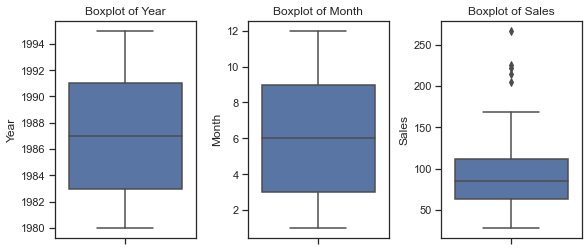

In [158]:
# boxplot

dfbox=df
plt.figure(figsize = (19,10))
feature_list = dfbox.columns
for i in range(len(feature_list)):
    plt.subplot(3, 7, i + 1)
    sns.boxplot(y = dfbox[feature_list[i]], data = dfbox)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### Sales

<AxesSubplot:xlabel='YearMonth'>

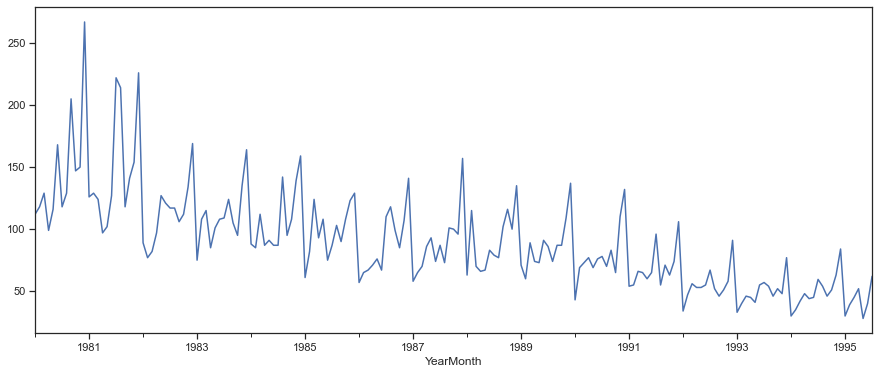

In [159]:
plt.figure(figsize=(15,6))
df['Sales'].plot()

### Yearly Boxplot


In [161]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,2],ax=ax)
plt.grid();

### Monthly Boxplot

In [162]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,2],ax=ax)
plt.grid();

### Week Days Boxplot

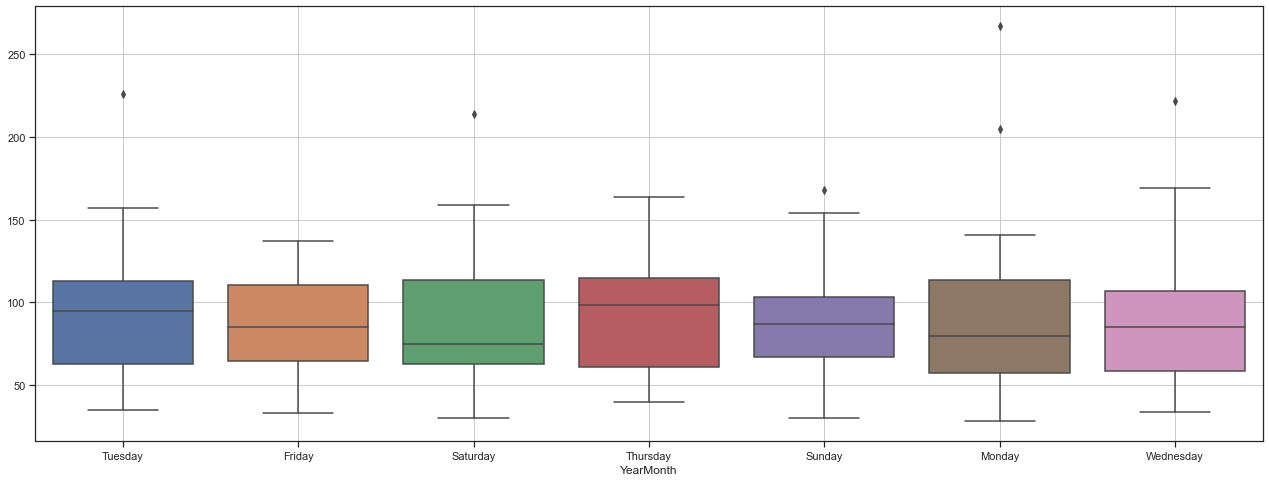

In [163]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.day_name(),y = df.values[:,2],ax=ax)
plt.grid();

### Graph of monthly sales across years.

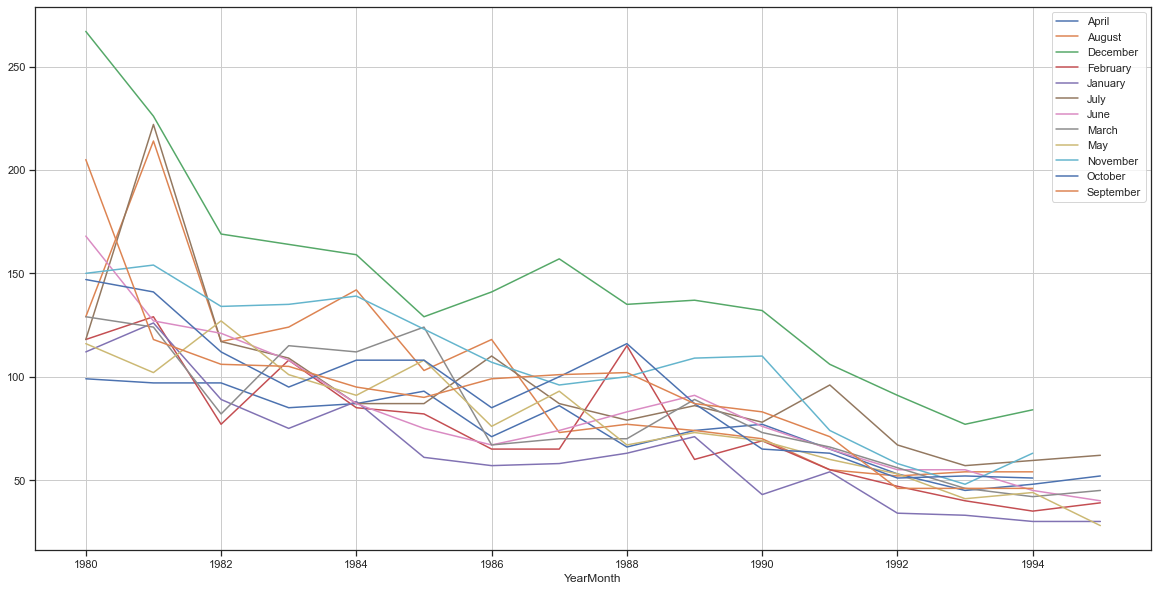

In [164]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sales', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

### Correlation plot

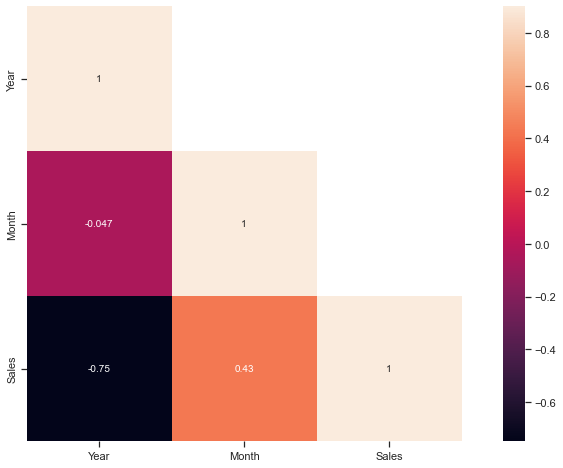

In [165]:
corr_all = df.corr()
mask = np.array(corr_all)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(corr_all, mask=mask,vmax=.9, square=True,annot=True);
plt.show()

### Plot ECDF: Empirical Cumulative Distribution Function

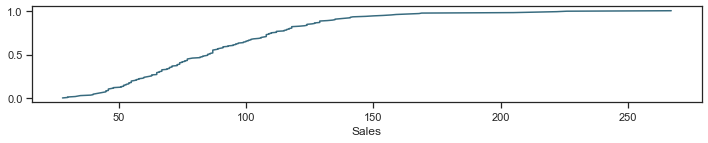

In [166]:
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

  
plt.subplot(312)
cdf = ECDF(df['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Sales');

### Decomposition 

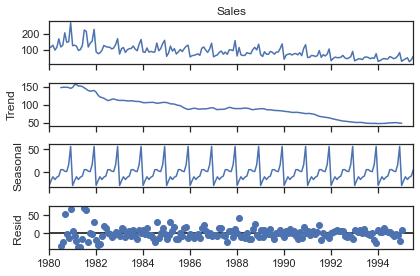

In [167]:
decomposition = seasonal_decompose(df['Sales'],model='additive')
decomposition.plot();

In [168]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -28.031994
1980-02-01   -17.543105
1980-03-01    -9.418105
1980-04-01   -15.230605
1980-05-01   -10.328819
1980-06-01    -7.810962
1980-07-01     5.718006
1980-08-01     5.931895
1980-09-01     2.651339
1980-10-01     1.748562
1980-11-01    16.723562
1980-12-01    55.590228
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -34.801339
1980-08-01   -25.056895
1980-09-01    53.973661
1980-10-01    -2.831895
1980-11-01   -14.140228
1980-12-01    66.28477

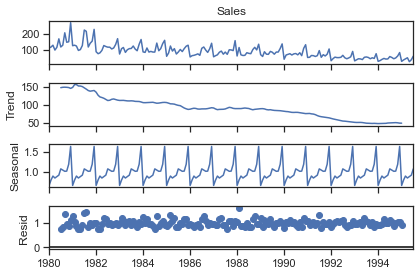

In [169]:
decomposition = seasonal_decompose(df['Sales'],model='multiplicative')
decomposition.plot();

In [170]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.668577
1980-02-01    0.804550
1980-03-01    0.898744
1980-04-01    0.851237
1980-05-01    0.886934
1980-06-01    0.921546
1980-07-01    1.074644
1980-08-01    1.044683
1980-09-01    1.015406
1980-10-01    1.020108
1980-11-01    1.189232
1980-12-01    1.624338
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.746542
1980-08-01    0.833636
1980-09-01    1.360672
1980-10-01    0.973117
1980-11-01    0.855614
1980-12-01    1.132642
Name: resid, dtype: fl

## 1.3 Split the data into training and test. The test data should start in 1991.

In [171]:
# Split the data into training and testing sets
train = df[df.index < '1991-01-01']
test = df[df.index >= '1991-01-01']

In [172]:
print('Shape of datasets:')
print("train dataset: ",train.shape)
print("test dataset: ",test.shape,'\n')
print('Rows of dataset: ')
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

Shape of datasets:
train dataset:  (132, 3)
test dataset:  (55, 3) 

Rows of dataset: 
First few rows of Training Data 
             Year  Month  Sales
YearMonth                     
1980-01-01  1980      1  112.0
1980-02-01  1980      2  118.0
1980-03-01  1980      3  129.0
1980-04-01  1980      4   99.0
1980-05-01  1980      5  116.0 

Last few rows of Training Data 
             Year  Month  Sales
YearMonth                     
1990-08-01  1990      8   70.0
1990-09-01  1990      9   83.0
1990-10-01  1990     10   65.0
1990-11-01  1990     11  110.0
1990-12-01  1990     12  132.0 

First few rows of Test Data 
             Year  Month  Sales
YearMonth                     
1991-01-01  1991      1   54.0
1991-02-01  1991      2   55.0
1991-03-01  1991      3   66.0
1991-04-01  1991      4   65.0
1991-05-01  1991      5   60.0 

Last few rows of Test Data 
             Year  Month  Sales
YearMonth                     
1995-03-01  1995      3   45.0
1995-04-01  1995      4   52.0
1995-0

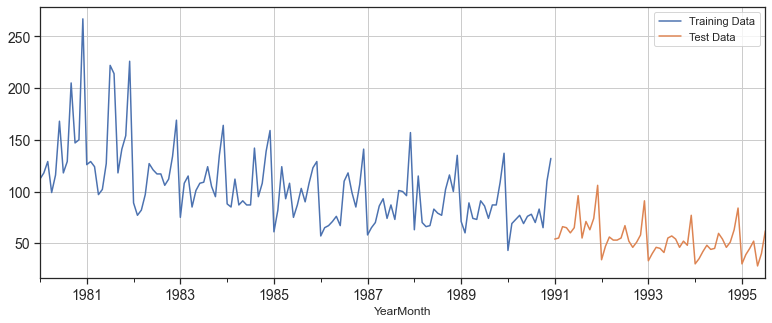

In [173]:
# Plot
train['Sales'].plot(figsize=(13,5), fontsize=14)
test['Sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## 1.4 Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

### Model 1: Linear Regression

In [174]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]

print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [175]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [176]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sales'].values)

LinearRegression()

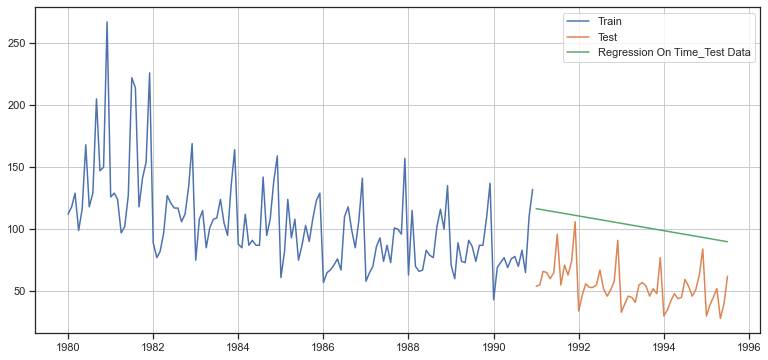

In [177]:
test_predictions_model1            = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [178]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sales'],test_predictions_model1,squared=False)
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Linear Regression'])
resultsDf

Test RMSE
Linear Regression  51.080941

### Model 2: Naive Approach: 

In [179]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [180]:
NaiveModel_test['naive'] = np.asarray(train['Sales'])[len(np.asarray(train['Sales']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

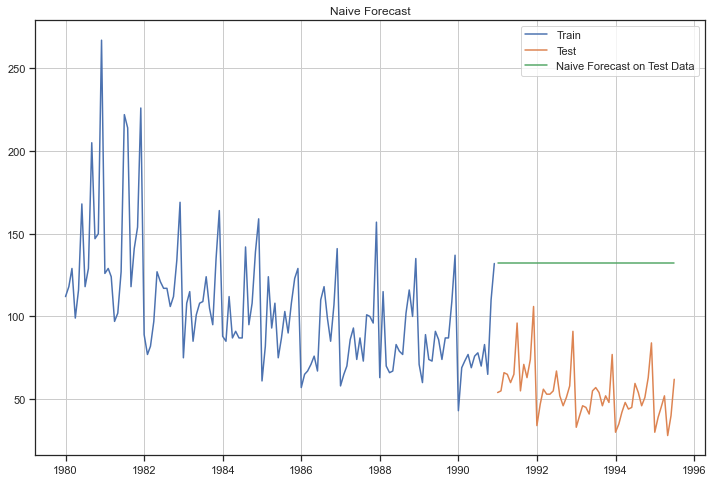

In [181]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [182]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sales'],NaiveModel_test['naive'],squared=False)
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
Linear Regression  51.080941
Naive Model        79.304391

### Model 3: Simple Average

In [183]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [184]:
SimpleAverage_test['mean_forecast'] = train['Sales'].mean()
SimpleAverage_test.head()

Year  Month  Sales  mean_forecast
YearMonth                                    
1991-01-01  1991      1   54.0     104.939394
1991-02-01  1991      2   55.0     104.939394
1991-03-01  1991      3   66.0     104.939394
1991-04-01  1991      4   65.0     104.939394
1991-05-01  1991      5   60.0     104.939394

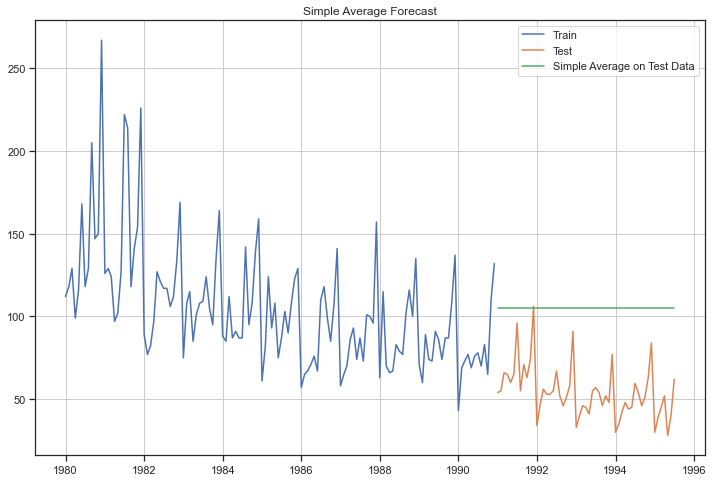

In [185]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sales'], label='Train')
plt.plot(SimpleAverage_test['Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [186]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sales'],SimpleAverage_test['mean_forecast'],squared=False)
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Linear Regression     51.080941
Naive Model           79.304391
Simple Average Model  53.049755

### Model 4: Moving Average


In [187]:
MovingAverage = df.copy()
MovingAverage.head()

Year  Month  Sales
YearMonth                     
1980-01-01  1980      1  112.0
1980-02-01  1980      2  118.0
1980-03-01  1980      3  129.0
1980-04-01  1980      4   99.0
1980-05-01  1980      5  116.0

In [188]:
MovingAverage['Trailing_2'] = MovingAverage['Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sales'].rolling(9).mean()

MovingAverage.head()

Year  Month  Sales  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                                     
1980-01-01  1980      1  112.0         NaN         NaN         NaN         NaN
1980-02-01  1980      2  118.0       115.0         NaN         NaN         NaN
1980-03-01  1980      3  129.0       123.5         NaN         NaN         NaN
1980-04-01  1980      4   99.0       114.0       114.5         NaN         NaN
1980-05-01  1980      5  116.0       107.5       115.5         NaN         NaN

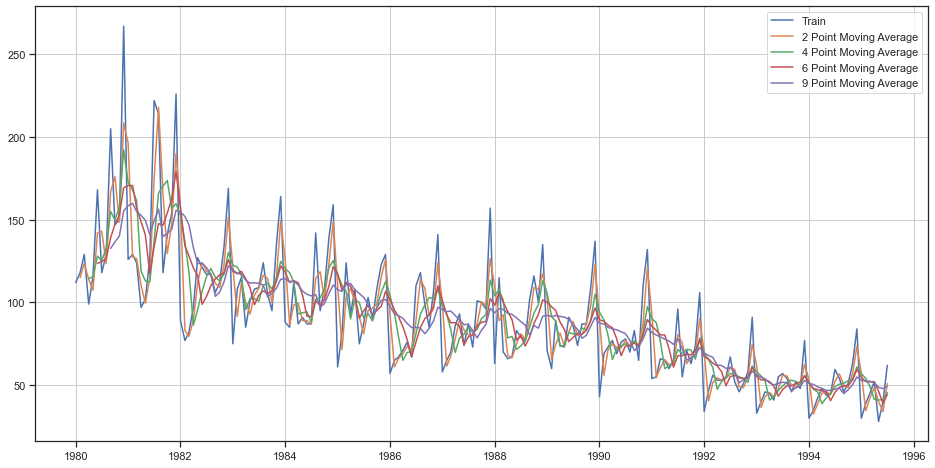

In [189]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [190]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index < '1991-01-01']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index >= '1991-01-01']
print(trailing_MovingAverage_test.shape)
print(trailing_MovingAverage_train.shape)

(55, 7)
(132, 7)


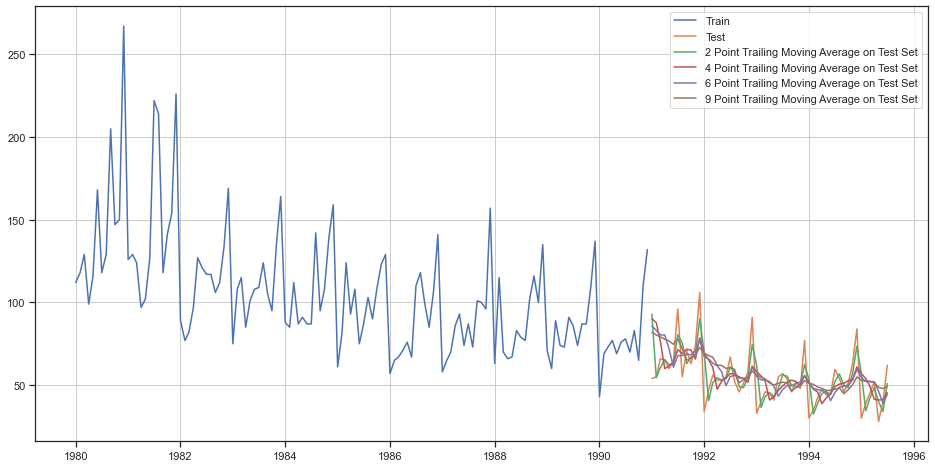

In [191]:

## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sales'], label='Test')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [192]:
## Test Data - RMSE --> 2 point Trailing MA
rmse_model4_test_2 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)

## Test Data - RMSE  --> 4 point Trailing MA
rmse_model4_test_4 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)

## Test Data - RMSE --> 6 point Trailing MA
rmse_model4_test_6 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)

## Test Data - RMSE  --> 9 point Trailing MA
rmse_model4_test_9 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)

In [193]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
Linear Regression            51.080941
Naive Model                  79.304391
Simple Average Model         53.049755
2pointTrailingMovingAverage  11.589082
4pointTrailingMovingAverage  14.506190
6pointTrailingMovingAverage  14.558008
9pointTrailingMovingAverage  14.797139

### Model 5: Simple Exponential Smoothing


In [194]:
SES_train = train.copy()
SES_test = test.copy()

In [195]:
model_SES = SimpleExpSmoothing(SES_train['Sales'])

In [196]:
model_SES_autofit = model_SES.fit(optimized=True)

In [197]:
model_SES_autofit.params

{'smoothing_level': 0.12362013466760018,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [198]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [199]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Year  Month  Sales    predict
YearMonth                                
1991-01-01  1991      1   54.0  87.983765
1991-02-01  1991      2   55.0  87.983765
1991-03-01  1991      3   66.0  87.983765
1991-04-01  1991      4   65.0  87.983765
1991-05-01  1991      5   60.0  87.983765

In [200]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict',i],squared=False)
    
    resultsDf_temp = resultsDf_temp.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

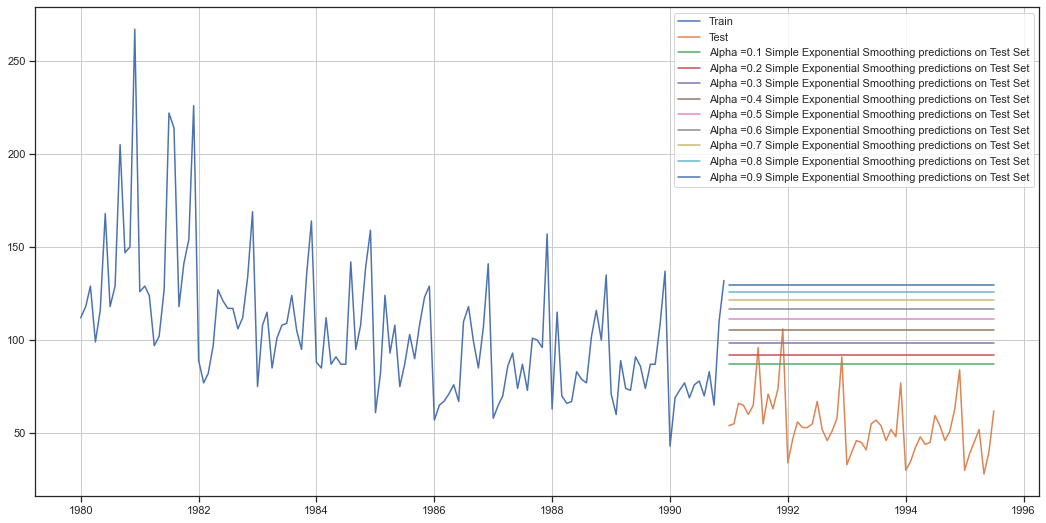

In [201]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.30000000000000004], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.5], label='Alpha =0.5 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.6], label='Alpha =0.6 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.7000000000000001], label='Alpha =0.7 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.8], label='Alpha =0.8 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.9], label='Alpha =0.9 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [202]:
resultsDf_temp.sort_values(by=['Test RMSE']).head(9)

Alpha Values  Train RMSE  Test RMSE
0           0.1   31.815610  36.429535
1           0.2   31.979391  40.957988
2           0.3   32.470164  47.096522
3           0.4   33.035130  53.356493
4           0.5   33.682839  59.229384
5           0.6   34.441171  64.558022
6           0.7   35.323261  69.284383
7           0.8   36.334596  73.359904
8           0.9   37.482782  76.725002

In [203]:
resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True)

## Test Data
resultsDf_5 = pd.DataFrame({'Test RMSE': [resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
Linear Regression                     51.080941
Naive Model                           79.304391
Simple Average Model                  53.049755
2pointTrailingMovingAverage           11.589082
4pointTrailingMovingAverage           14.506190
6pointTrailingMovingAverage           14.558008
9pointTrailingMovingAverage           14.797139
Alpha=0.1,SimpleExponentialSmoothing  36.429535

### Model 6: Double Exponential Smoothing (Holt's Model)


In [204]:
DES_train = train.copy()
DES_test = test.copy()

In [205]:
model_DES = Holt(DES_train['Sales'])

In [206]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
model_DES_autofit = model_DES.fit(optimized=True)

model_DES_autofit.params

{'smoothing_level': 0.16213323035870825,
 'smoothing_trend': 0.13152151511397958,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [207]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Year  Month  Sales    predict
YearMonth                                
1991-01-01  1991      1   54.0  87.249995
1991-02-01  1991      2   55.0  88.152724
1991-03-01  1991      3   66.0  89.055453
1991-04-01  1991      4   65.0  89.958182
1991-05-01  1991      5   60.0  90.860911

In [208]:
del resultsDf_temp
## First we will define an empty dataframe to store our values from the loop

resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [209]:
## Test Data

rmse_model_temp = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict'],squared=False)
print("For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model_temp))

For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 37.193


In [210]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)
resultsDf_6

Alpha Values  Beta Values  Train RMSE   Test RMSE
0            0.1          0.1   34.439111   36.510010
1            0.1          0.2   33.450729   48.221436
2            0.1          0.3   33.145789   77.649847
3            0.1          0.4   33.262191   99.064536
4            0.1          0.5   33.688415  123.742433
..           ...          ...         ...         ...
95           1.0          0.6   51.831610  801.137173
96           1.0          0.7   54.497039  841.349112
97           1.0          0.8   57.365879  853.421959
98           1.0          0.9   60.474309  834.167545
99           1.0          1.0   63.873454  779.536777

[100 rows x 4 columns]

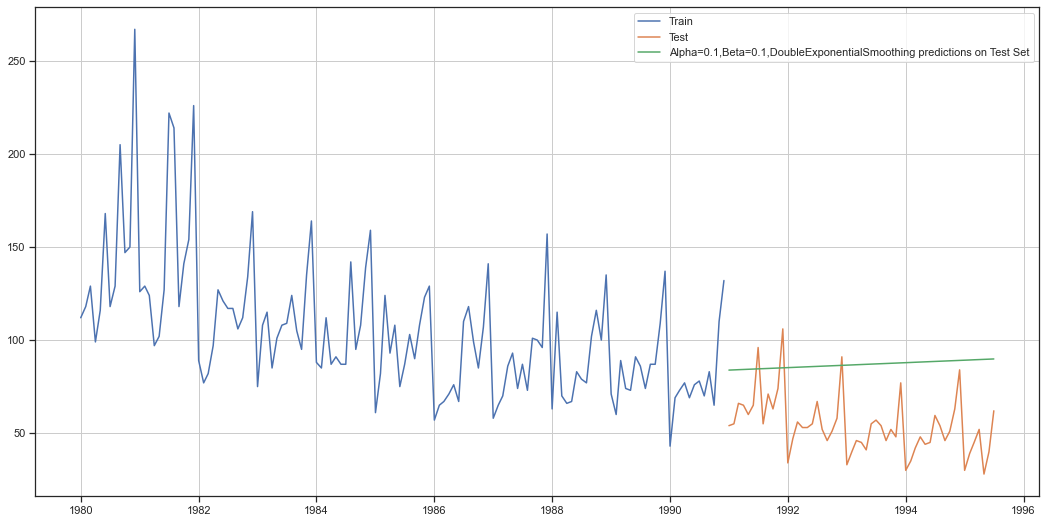

In [211]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [212]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
0            0.1          0.1   34.439111  36.510010
1            0.1          0.2   33.450729  48.221436
10           0.2          0.1   33.097427  65.251675
2            0.1          0.3   33.145789  77.649847
20           0.3          0.1   33.611269  98.152852

In [213]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
Linear Regression                                   51.080941
Naive Model                                         79.304391
Simple Average Model                                53.049755
2pointTrailingMovingAverage                         11.589082
4pointTrailingMovingAverage                         14.506190
6pointTrailingMovingAverage                         14.558008
9pointTrailingMovingAverage                         14.797139
Alpha=0.1,SimpleExponentialSmoothing                36.429535
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.510010

### Model 7: Triple Exponential Smoothing (Holt - Winter's Model)


In [214]:
TES_train = train.copy()
TES_test = test.copy()

In [215]:
model_TES_ta_sa = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='additive')
model_TES_ta_sm = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='multiplicative')
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
model_TES_tm_sa = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='additive')

In [216]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [217]:
model_TES_autofit_ta_sa = model_TES_ta_sa.fit(optimized=True)
model_TES_autofit_ta_sm = model_TES_ta_sm.fit(optimized=True)
model_TES_autofit_tm_sm = model_TES_tm_sm.fit(optimized=True)
model_TES_autofit_tm_sa = model_TES_tm_sa.fit(optimized=True)

In [218]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [219]:
model_TES_autofit_ta_sa.params

{'smoothing_level': 0.08960433505218426,
 'smoothing_trend': 4.413966069588638e-06,
 'smoothing_seasonal': 0.0004157803990427016,
 'damping_trend': nan,
 'initial_level': 147.0515636913057,
 'initial_trend': -0.5499039651905253,
 'initial_seasons': array([-31.13704235, -18.79197854, -10.81272888, -21.45979782,
        -12.66678806,  -7.22401744,   2.76458277,   8.88611045,
          4.89234606,   2.97130104,  21.06211879,  63.35428302]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [220]:
model_TES_autofit_ta_sm.params

{'smoothing_level': 0.0670736477881048,
 'smoothing_trend': 0.05034447963489059,
 'smoothing_seasonal': 5.530819815710921e-06,
 'damping_trend': nan,
 'initial_level': 143.62742229783117,
 'initial_trend': -0.881022256579511,
 'initial_seasons': array([0.78463902, 0.89027285, 0.97266809, 0.85043745, 0.95597833,
        1.04257042, 1.14553923, 1.21867002, 1.15521845, 1.13071585,
        1.3179129 , 1.81774974]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [221]:
model_TES_autofit_tm_sm.params

{'smoothing_level': 0.06011453863813661,
 'smoothing_trend': 0.0243164427225908,
 'smoothing_seasonal': 0.0012940790825468507,
 'damping_trend': nan,
 'initial_level': 165.3727307511266,
 'initial_trend': 0.9926520869676266,
 'initial_seasons': array([0.68325583, 0.77491034, 0.84839158, 0.74099431, 0.83391259,
        0.90587308, 0.99561917, 1.06235707, 1.00487861, 0.98342806,
        1.14794313, 1.57967615]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [222]:
model_TES_autofit_tm_sa.params

{'smoothing_level': 0.14642857142857144,
 'smoothing_trend': 0.05324675324675325,
 'smoothing_seasonal': 0.13131868131868132,
 'damping_trend': nan,
 'initial_level': 145.27499999999992,
 'initial_trend': 1.0052617032482805,
 'initial_seasons': array([-30.484375  , -25.046875  , -15.53645833, -30.734375  ,
        -16.46354167,  -9.72395833,  12.44270833,  17.53645833,
          5.55729167,  -3.890625  ,  15.99479167,  80.34895833]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [223]:
TES_test['predict_ta_sa'] = model_TES_autofit_ta_sa.forecast(steps=len(test))
TES_test.head()

Year  Month  Sales  predict_ta_sa
YearMonth                                    
1991-01-01  1991      1   54.0      42.632832
1991-02-01  1991      2   55.0      54.428148
1991-03-01  1991      3   66.0      61.857596
1991-04-01  1991      4   65.0      50.660733
1991-05-01  1991      5   60.0      58.903909

In [224]:
TES_test['predict_ta_sm'] = model_TES_autofit_ta_sm.forecast(steps=len(test))
TES_test.head()

Year  Month  Sales  predict_ta_sa  predict_ta_sm
YearMonth                                                   
1991-01-01  1991      1   54.0      42.632832      56.596867
1991-02-01  1991      2   55.0      54.428148      64.021360
1991-03-01  1991      3   66.0      61.857596      69.733300
1991-04-01  1991      4   65.0      50.660733      60.783903
1991-05-01  1991      5   60.0      58.903909      68.117557

In [225]:
TES_test['predict_tm_sm'] = model_TES_autofit_tm_sm.forecast(steps=len(test))
TES_test.head()

Year  Month  Sales  predict_ta_sa  predict_ta_sm  predict_tm_sm
YearMonth                                                                  
1991-01-01  1991      1   54.0      42.632832      56.596867      55.182051
1991-02-01  1991      2   55.0      54.428148      64.021360      62.398045
1991-03-01  1991      3   66.0      61.857596      69.733300      68.054415
1991-04-01  1991      4   65.0      50.660733      60.783903      59.248021
1991-05-01  1991      5   60.0      58.903909      68.117557      66.395269

In [226]:
TES_test['predict_tm_sa'] = model_TES_autofit_tm_sa.forecast(steps=len(test))
TES_test.head()

Year  Month  Sales  predict_ta_sa  predict_ta_sm  predict_tm_sm  \
YearMonth                                                                     
1991-01-01  1991      1   54.0      42.632832      56.596867      55.182051   
1991-02-01  1991      2   55.0      54.428148      64.021360      62.398045   
1991-03-01  1991      3   66.0      61.857596      69.733300      68.054415   
1991-04-01  1991      4   65.0      50.660733      60.783903      59.248021   
1991-05-01  1991      5   60.0      58.903909      68.117557      66.395269   

            predict_tm_sa  
YearMonth                  
1991-01-01      46.284930  
1991-02-01      58.354810  
1991-03-01      64.361205  
1991-04-01      54.433907  
1991-05-01      60.002489

In [227]:
## Test Data

rmse_model_temp_ta_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa'],squared=False)
print("For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sa))

## Test Data

rmse_model_temp_ta_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm'],squared=False)
print("For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sm))

## Test Data

rmse_model_temp_tm_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm'],squared=False)
print("For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sm))

## Test Data

rmse_model_temp_tm_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa'],squared=False)
print("For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sa))

For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is 14.148
For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 20.388
For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 17.889
For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is 16.254


In [228]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse_model_temp}
                           ,index=['Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Linear Regression                                   51.080941
Naive Model                                         79.304391
Simple Average Model                                53.049755
2pointTrailingMovingAverage                         11.589082
4pointTrailingMovingAverage                         14.506190
6pointTrailingMovingAverage                         14.558008
9pointTrailingMovingAverage                         14.797139
Alpha=0.1,SimpleExponentialSmoothing                36.429535
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.510010
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  37.192623

In [229]:
TES_train = train.copy()
TES_test = test.copy()
del resultsDf_7_2

## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],
                             'Method' : []})
resultsDf_7_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE, Method]
Index: []

In [230]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sa',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sa'}
                                                 , ignore_index=True)


In [231]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sm',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sm'}
                                                 , ignore_index=True)


In [232]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sm',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sm'}
                                                 , ignore_index=True)


In [233]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sa',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sa'}
                                                 , ignore_index=True)

In [234]:
TES_test.head()

Year  Month  Sales  (predict_ta_sa, 0.1, 0.1, 0.1)  \
YearMonth                                                        
1991-01-01  1991      1   54.0                       45.711834   
1991-02-01  1991      2   55.0                       56.369270   
1991-03-01  1991      3   66.0                       63.004762   
1991-04-01  1991      4   65.0                       51.663022   
1991-05-01  1991      5   60.0                       58.931424   

            (predict_ta_sa, 0.1, 0.1, 0.2)  \
YearMonth                                    
1991-01-01                       46.537302   
1991-02-01                       60.659980   
1991-03-01                       65.794341   
1991-04-01                       58.369250   
1991-05-01                       61.246579   

            (predict_ta_sa, 0.1, 0.1, 0.30000000000000004)  \
YearMonth                                                    
1991-01-01                                       46.559436   
1991-02-01                                       62.645947   
1991-03-01                                       66.979401   
1991-04-01                                       62.190538   
1991-05-01                                       62.077338   

            (predict_ta_sa, 0.1, 0.1, 0.4)  (predict_ta_sa, 0.1, 0.1, 0.5)  \
YearMonth                                                                    
1991-01-01                       46.071952                       45.225493   
1991-02-01                       63.356292                       63.447907   
1991-03-01                       67.649481                       68.330584   
1991-04-01                       64.397061                       65.989684   
1991-05-01                       62.127541                       62.025325   

            (predict_ta_sa, 0.1, 0.1, 0.6)  \
YearMonth                                    
1991-01-01                       44.012323   
1991-02-01                       63.255359   
1991-03-01                       69.025477   
1991-04-01                       67.481555   
1991-05-01                       62.111373   

            (predict_ta_sa, 0.1, 0.1, 0.7000000000000001)  ...  \
YearMonth                                                  ...   
1991-01-01                                      42.371394  ...   
1991-02-01                                      62.959944  ...   
1991-03-01                                      69.443834  ...   
1991-04-01                                      68.978770  ...   
1991-05-01                                      62.439476  ...   

            (predict_tm_sa, 0.9, 0.8, 0.9)  (predict_tm_sa, 0.9, 0.9, 0.1)  \
YearMonth                                                                    
1991-01-01                    3.735952e+33                       49.121533   
1991-02-01                    7.148786e+32                       37.090349   
1991-03-01                    1.357303e+32                       15.196663   
1991-04-01                    2.576482e+31                       -2.515265   
1991-05-01                   -1.230813e+29                       -1.476818   

            (predict_tm_sa, 0.9, 0.9, 0.2)  \
YearMonth                                    
1991-01-01                       76.518424   
1991-02-01                       76.114781   
1991-03-01                       47.008485   
1991-04-01                        9.602428   
1991-05-01                       -5.631953   

            (predict_tm_sa, 0.9, 0.9, 0.30000000000000004)  \
YearMonth                                                    
1991-01-01                                      376.731488   
1991-02-01                                      509.316662   
1991-03-01                                      593.068850   
1991-04-01                                      669.057836   
1991-05-01                                      759.079023   

            (predict_tm_sa, 0.9, 0.9, 0.4)  (predict_tm_sa, 0.9, 0.9, 0.5)  \
YearMonth                                                                  

In [235]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE Method
2136           0.2          0.7           0.2   24.042290   8.992350  tm_sm
1010           0.1          0.2           0.1   19.770392   9.221020  ta_sm
1011           0.1          0.2           0.2   20.253487   9.543696  ta_sm
1151           0.2          0.6           0.2   23.129850   9.922552  ta_sm
1012           0.1          0.2           0.3   20.871304   9.952909  ta_sm

In [236]:
resultsDf_7_3 = pd.DataFrame({'Test RMSE': [resultsDf_7_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_3])
resultsDf

Test RMSE
Linear Regression                                   51.080941
Naive Model                                         79.304391
Simple Average Model                                53.049755
2pointTrailingMovingAverage                         11.589082
4pointTrailingMovingAverage                         14.506190
6pointTrailingMovingAverage                         14.558008
9pointTrailingMovingAverage                         14.797139
Alpha=0.1,SimpleExponentialSmoothing                36.429535
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.510010
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  37.192623
Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialS...   8.992350

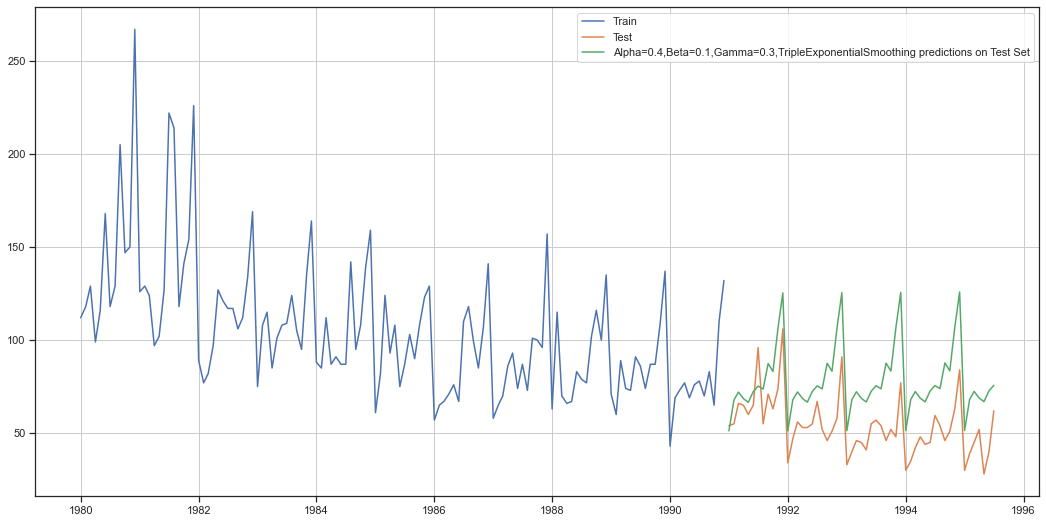

In [237]:
#  Best figures obtained for Trend = Multiplicative and Seasonality = Multiplicative
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict_tm_sm', 0.4, 0.1, 0.30000000000000004], 
         label='Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

## 1.5 Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [238]:
from statsmodels.tsa.stattools import adfuller

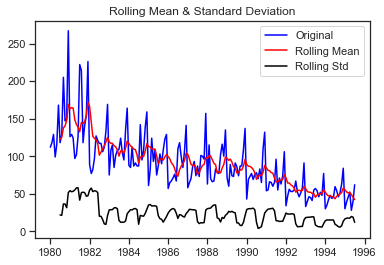

Results of Dickey-Fuller Test:
Test Statistic                  -1.892338
p-value                          0.335674
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [239]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
test_stationarity(df['Sales'])

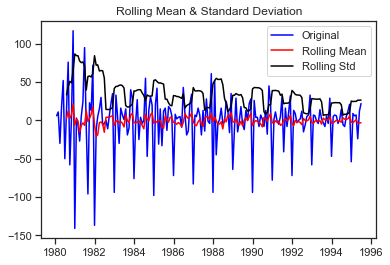

Results of Dickey-Fuller Test:
Test Statistic                -8.032729e+00
p-value                        1.938803e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [240]:
test_stationarity(df['Sales'].diff().dropna())

## 1.6 Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### Auto - Arima Model  

In [241]:
import itertools
p = q = range(0, 4)
d= range(1,2) #since series is stationary at d=1
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [242]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [243]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748299
ARIMA(0, 1, 2) - AIC:1279.671528853578
ARIMA(0, 1, 3) - AIC:1280.5453761734661
ARIMA(1, 1, 0) - AIC:1317.3503105381546
ARIMA(1, 1, 1) - AIC:1280.5742295380082
ARIMA(1, 1, 2) - AIC:1279.8707234231906
ARIMA(1, 1, 3) - AIC:1281.870722330995
ARIMA(2, 1, 0) - AIC:1298.6110341604945
ARIMA(2, 1, 1) - AIC:1281.507862186846
ARIMA(2, 1, 2) - AIC:1281.870722226426
ARIMA(2, 1, 3) - AIC:1274.6950984794705
ARIMA(3, 1, 0) - AIC:1297.4810917271716
ARIMA(3, 1, 1) - AIC:1282.4192776271937
ARIMA(3, 1, 2) - AIC:1283.7207405977147
ARIMA(3, 1, 3) - AIC:1278.6583144202655


In [244]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
11  (2, 1, 3)  1274.695098
15  (3, 1, 3)  1278.658314
2   (0, 1, 2)  1279.671529
6   (1, 1, 2)  1279.870723
3   (0, 1, 3)  1280.545376
5   (1, 1, 1)   1280.57423
9   (2, 1, 1)  1281.507862
10  (2, 1, 2)  1281.870722
7   (1, 1, 3)  1281.870722
1   (0, 1, 1)  1282.309832
13  (3, 1, 1)  1282.419278
14  (3, 1, 2)  1283.720741
12  (3, 1, 0)  1297.481092
8   (2, 1, 0)  1298.611034
4   (1, 1, 0)  1317.350311
0   (0, 1, 0)  1333.154673

In [245]:
auto_ARIMA = ARIMA(train['Sales'], order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sat, 08 Jul 2023   AIC                           1274.695
Time:                        09:32:32   BIC                           1291.946
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6780      0.084    -20.018      0.000      -1.842      -1.514
ar.L2         -0.7288      0.084     -8.694      0.000      -0.893      -0.564
ma.L1          1.0448      0.649      1.609      0.1

In [246]:
# Prediction rsme
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

rmse = mean_squared_error(test['Sales'], predicted_auto_ARIMA.tolist(), squared=False)
print(rmse)

36.41939808200016


In [247]:
results = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Auto_ARIMA'])

resultsDf = pd.concat([resultsDf, results])
resultsDf

Test RMSE
Linear Regression                                   51.080941
Naive Model                                         79.304391
Simple Average Model                                53.049755
2pointTrailingMovingAverage                         11.589082
4pointTrailingMovingAverage                         14.506190
6pointTrailingMovingAverage                         14.558008
9pointTrailingMovingAverage                         14.797139
Alpha=0.1,SimpleExponentialSmoothing                36.429535
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.510010
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  37.192623
Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialS...   8.992350
Auto_ARIMA                                          36.419398

## AUTO- SARIMA

In [248]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [249]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [250]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207318
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380894
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:4021.076949102411
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869385933
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635752423
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:2504.402831731293
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.879454069752
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945565
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3677.365711143881
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.7535403931095
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.7482702731286
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.5304136128359
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3530.0677909583105
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918343
SARIMA(0, 1, 1)x(0, 0, 

In [251]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
222  (3, 1, 1)  (3, 0, 2, 12)  774.400285
238  (3, 1, 2)  (3, 0, 2, 12)  774.880937
220  (3, 1, 1)  (3, 0, 0, 12)  775.426699
221  (3, 1, 1)  (3, 0, 1, 12)   775.49533
252  (3, 1, 3)  (3, 0, 0, 12)  775.561018

In [252]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Sat, 08 Jul 2023   AIC                            774.400
Time:                                         09:45:58   BIC                            799.618
Sample:                                              0   HQIC                           784.578
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.201       0

In [253]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [254]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  55.235167  13.907677      27.976622      82.493712
1  68.122931  13.991116      40.700847      95.545015
2  67.908678  14.012166      40.445337      95.372020
3  66.786164  14.099477      39.151696      94.420632
4  69.760125  14.108836      42.107314      97.412935

In [255]:
rmse = mean_squared_error(test['Sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

18.53550451433853


In [256]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['(3,1,1),(3,0,2,12),Auto_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

Test RMSE
Linear Regression                                   51.080941
Naive Model                                         79.304391
Simple Average Model                                53.049755
2pointTrailingMovingAverage                         11.589082
4pointTrailingMovingAverage                         14.506190
6pointTrailingMovingAverage                         14.558008
9pointTrailingMovingAverage                         14.797139
Alpha=0.1,SimpleExponentialSmoothing                36.429535
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.510010
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  37.192623
Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialS...   8.992350
Auto_ARIMA                                          36.419398
(3,1,1),(3,0,2,12),Auto_SARIMA                      18.535505

#### Model : Manual ARIMA

In [257]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

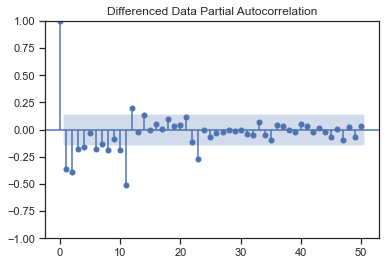

In [258]:
plot_pacf(df['Sales'],lags=50)
plot_pacf(df['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

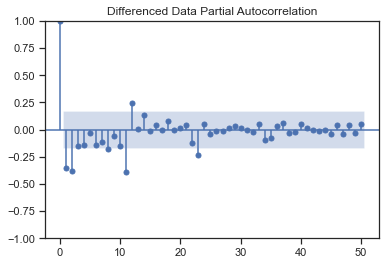

In [259]:
plot_pacf(train['Sales'],lags=50)
plot_pacf(train['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [260]:
manual_ARIMA = ARIMA(train['Sales'], order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sat, 08 Jul 2023   AIC                           1281.871
Time:                        11:06:38   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

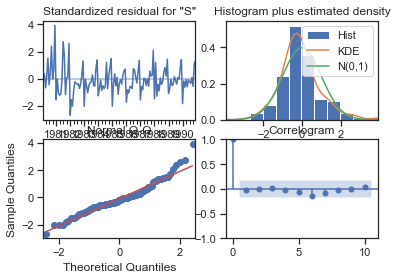

In [261]:
results_manual_ARIMA.plot_diagnostics();

In [262]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
rmse = mean_squared_error(test['Sales'],predicted_manual_ARIMA,squared=False)
print('RMSE:',rmse)

RMSE: 36.473224885844594


In [263]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(3,1,3)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE
Linear Regression                                   51.080941
Naive Model                                         79.304391
Simple Average Model                                53.049755
2pointTrailingMovingAverage                         11.589082
4pointTrailingMovingAverage                         14.506190
6pointTrailingMovingAverage                         14.558008
9pointTrailingMovingAverage                         14.797139
Alpha=0.1,SimpleExponentialSmoothing                36.429535
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.510010
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  37.192623
Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialS...   8.992350
Auto_ARIMA                                          36.419398
(3,1,1),(3,0,2,12),Auto_SARIMA                      18.535505
ARIMA(3,1,3)                                        36.473225

#### Model  : Manual SARIMA

In [264]:

SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC


Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [265]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforc1e_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -538.016
Date:                            Sat, 08 Jul 2023   AIC                           1094.031
Time:                                    11:06:49   BIC                           1119.044
Sample:                                         0   HQIC                          1104.188
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5492      0.228     -2.409      0.016      -0.996      -0.102
ar.L2         -0.0744      0.099   

In [266]:
SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_manual_SARIMA.aic},
                               ignore_index=True)
SARIMA_AIC

param       seasonal          AIC
0  (3, 1, 3)  (3, 0, 3, 12)  1094.031391

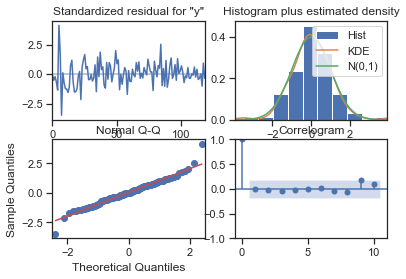

In [267]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [268]:
predicted_manual_SARIMA_6 = results_manual_SARIMA.get_forecast(steps=len(test))
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  38.862277  21.080080      -2.453920      80.178474
1  65.279095  21.893572      22.368483     108.189708
2  60.205587  21.939540      17.204879     103.206295
3  59.298331  22.254004      15.681284     102.915377
4  60.593689  22.300315      16.885875     104.301504

In [269]:
rmse_manual_sarima = mean_squared_error(test['Sales'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse_manual_sarima)

14.975746352466942


In [270]:
resultsDf_10_1 = pd.DataFrame({'Test RMSE': rmse_manual_sarima}
                           ,index=['(2,1,2)(2,1,2,12),Manual_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_10_1])
resultsDf

Test RMSE
Linear Regression                                   51.080941
Naive Model                                         79.304391
Simple Average Model                                53.049755
2pointTrailingMovingAverage                         11.589082
4pointTrailingMovingAverage                         14.506190
6pointTrailingMovingAverage                         14.558008
9pointTrailingMovingAverage                         14.797139
Alpha=0.1,SimpleExponentialSmoothing                36.429535
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.510010
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  37.192623
Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialS...   8.992350
Auto_ARIMA                                          36.419398
(3,1,1),(3,0,2,12),Auto_SARIMA                      18.535505
ARIMA(3,1,3)                                        36.473225
(2,1,2)(2,1,2,12),Manual_SARIMA                     14.975746

## 1.7 Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [271]:
resultsDf.sort_values(by=['Test RMSE'])

Test RMSE
Alpha=0.2,Beta=0.7,Gamma=0.2,TripleExponentialS...   8.992350
2pointTrailingMovingAverage                         11.589082
4pointTrailingMovingAverage                         14.506190
6pointTrailingMovingAverage                         14.558008
9pointTrailingMovingAverage                         14.797139
(2,1,2)(2,1,2,12),Manual_SARIMA                     14.975746
(3,1,1),(3,0,2,12),Auto_SARIMA                      18.535505
Auto_ARIMA                                          36.419398
Alpha=0.1,SimpleExponentialSmoothing                36.429535
ARIMA(3,1,3)                                        36.473225
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.510010
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  37.192623
Linear Regression                                   51.080941
Simple Average Model                                53.049755
Naive Model                                         79.304391

## 1.9 Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [272]:
date = pd.date_range(start='8/1/1995', end='7/1/1996', freq='MS')
date

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [273]:
future_predictions=pd.DataFrame(columns=['Sales_Predictions'],index=date)

In [274]:
TES_train = df.copy()

In [275]:
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
alpha=0.2
beta=0.8
gamma=0.2
model_TES = model_TES_tm_sm.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma,
                                optimized=False,use_brute=True)
prediction=model_TES.forecast(steps=12)

In [276]:
future_predictions['Sales_Predictions']=prediction
future_predictions

Sales_Predictions
1995-08-01          36.096841
1995-09-01          34.999961
1995-10-01          36.289937
1995-11-01          43.126839
1995-12-01          61.593978
1996-01-01          24.293852
1996-02-01          31.406019
1996-03-01          37.545514
1996-04-01          39.735393
1996-05-01          33.753457
1996-06-01          38.868148
1996-07-01          43.093112

In [277]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(model_TES.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(model_TES.resid,ddof=1)})
pred_df.head()

lower_CI  prediction    upper_ci
1995-08-01  -6.382843   36.096841   78.576525
1995-09-01  -7.479723   34.999961   77.479645
1995-10-01  -6.189747   36.289937   78.769621
1995-11-01   0.647155   43.126839   85.606523
1995-12-01  19.114294   61.593978  104.073662

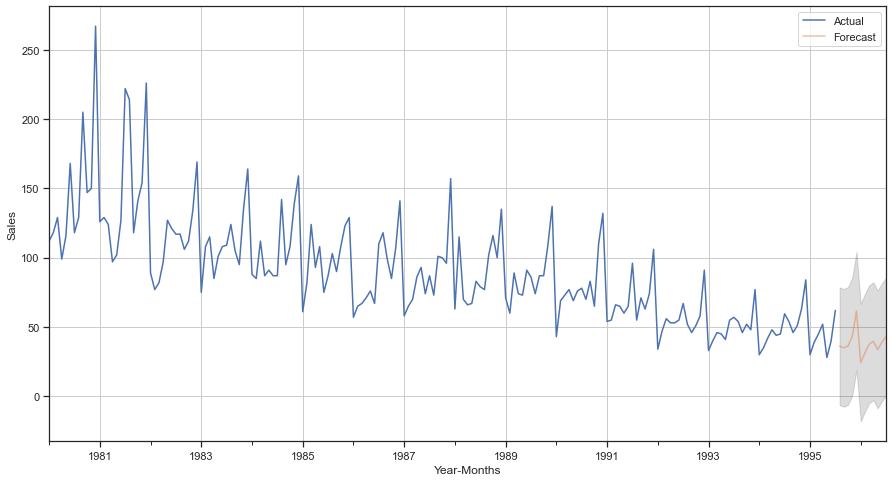

In [278]:
# plot the forecast along with the confidence band

axis = df['Sales'].plot(label='Actual', figsize=(15,8))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()